In [1]:
%load_ext autoreload
%autoreload 2

In [66]:
import os
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-pastel')

In [3]:
from ngsim import *
from sensing import *
from measures import *
from simulator import *
from three_network import *

/home/lemma/anaconda2/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [233]:
ls = pickle.load(open(os.path.join('..', 'data', 'results', 'mp_' + str(0.05) + '.pickle'), 'rb'))
[ss1, ss2, ss3, m_true1, m_true2, m_true3] = ls

In [234]:
k_df1, v_df1 = process_err(ss1.get_err(ss1.name))
k_df2, v_df2 = process_err(ss2.get_err(ss2.name))
k_df3, v_df3 = process_err(ss3.get_err(ss3.name))

In [251]:
v_df2

,MAE,NRMSE,R2,RMSE,RMSN,RMSPE,SMAPE1,SMAPE2
1,8.71252e-06,0.0876914,0.943695,0.0029517,0.0943723,0.137217,0.036203,0.0287075
2,7.67607e-06,0.0785447,0.949927,0.00277057,0.0838819,0.134356,0.0305954,0.0248094
3,5.61599e-06,0.0686645,0.957744,0.00236981,0.0728488,0.105579,0.026558,0.0222462
4,6.34799e-06,0.0718838,0.952384,0.00251952,0.0761334,0.10941,0.0256711,0.0219414
5,6.33431e-06,0.0676129,0.952442,0.0025168,0.0711174,0.0969615,0.0250526,0.0221444


In [252]:
v_df3.loc[[1,2,3,4], :]

,MAE,NRMSE,R2,RMSE,RMSN,RMSPE,SMAPE1,SMAPE2
1,7.10219e-05,0.239424,0.619645,0.00842745,0.2598,29.3585,0.102274,0.0771652
2,6.57834e-05,0.213364,0.648749,0.0081107,0.228698,29.948,0.0877427,0.0677283
3,8.13724e-05,0.252682,0.572711,0.00902067,0.27398,33.931,0.10972,0.0848999
4,7.63238e-05,0.257871,0.57589,0.00873635,0.280825,12.6733,0.100847,0.090256


In [241]:
v_df3.loc[[1,2,3,4], :].mean(axis = 0)

MAE        0.000074
NRMSE      0.240835
R2         0.604249
RMSE       0.008574
RMSN       0.260826
RMSPE     26.477705
SMAPE1     0.100146
SMAPE2     0.080012
dtype: float64

In [237]:
k_df3.loc[[1,2,3,4], :]

,MAE,NRMSE,R2,RMSE,RMSN,RMSPE,SMAPE1,SMAPE2
1,5.74523e-05,0.454945,0.50918,0.00757973,0.598245,2.28936,0.209202,0.175386
2,4.9589e-05,0.413089,0.668269,0.00704194,0.592796,1.8721,0.210081,0.165925
3,7.24366e-05,0.437539,0.567975,0.00851097,0.586324,2.26539,0.21378,0.169573
4,5.35387e-05,0.731906,0.0596546,0.00731702,1.11572,2.36132,0.276346,0.277322


In [8]:
method_res_dict = dict()
for s1 in ['SI', 'KNN', 'NI']:
    method_res_dict[s1] = dict()
    for s2 in ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2']:
        ls = pickle.load(open(os.path.join('..', 'data', 'results', 'method_' + s1 + '_' + s2 + '.pickle'), 'rb'))
        [ss1, ss2, ss3, m_true1, m_true2, m_true3] = ls
        k_df1, v_df1 = process_err(ss1.get_err(ss1.name))
        k_df2, v_df2 = process_err(ss2.get_err(ss2.name))
        k_df3, v_df3 = process_err(ss3.get_err(ss3.name))
        method_res_dict[s1][s2] = [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3]

In [9]:
mt_res_dict = dict()
for meters in [10, 20, 30, 40, 50, 60, 70]:
    ls = pickle.load(open(os.path.join('..', 'data', 'results', 'mt_' + str(meters) + '.pickle'), 'rb'))
    [ss1, ss2, ss3, m_true1, m_true2, m_true3] = ls
    k_df1, v_df1 = process_err(ss1.get_err(ss1.name))
    k_df2, v_df2 = process_err(ss2.get_err(ss2.name))
    k_df3, v_df3 = process_err(ss3.get_err(ss3.name))
    mt_res_dict[meters] = [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3]

In [181]:
spn_res_dict = dict()
for spn in [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]:
    ls = pickle.load(open(os.path.join('..', 'data', 'results', 'spn_' + str(spn) + '.pickle'), 'rb'))
    [ss1, ss2, ss3, m_true1, m_true2, m_true3] = ls
    k_df1, v_df1 = process_err(ss1.get_err(ss1.name))
    k_df2, v_df2 = process_err(ss2.get_err(ss2.name))
    k_df3, v_df3 = process_err(ss3.get_err(ss3.name))
    spn_res_dict[spn] = [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3]

In [12]:
sr_res_dict = dict()
for sr in [100, 300, 500, 700, 900, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]:
    ls = pickle.load(open(os.path.join('..', 'data', 'results', 'sr_' + str(sr) + '.pickle'), 'rb'))
    [ss1, ss2, ss3, m_true1, m_true2, m_true3] = ls
    k_df1, v_df1 = process_err(ss1.get_err(ss1.name))
    k_df2, v_df2 = process_err(ss2.get_err(ss2.name))
    k_df3, v_df3 = process_err(ss3.get_err(ss3.name))
    sr_res_dict[sr] = [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3]

In [ ]:
mp_list = np.linspace(0.01, 1, 20)[:14].tolist() + [0.7] 
mp_res_dict = dict()
for p_rate in mp_list:
#     print (p_rate)
    ls = pickle.load(open(os.path.join('..', 'data', 'results', 'mp_' + str(p_rate) + '.pickle'), 'rb'))
    [ss1, ss2, ss3, m_true1, m_true2, m_true3] = ls
    k_df1, v_df1 = process_err(ss1.get_err(ss1.name))
    k_df2, v_df2 = process_err(ss2.get_err(ss2.name))
    k_df3, v_df3 = process_err(ss3.get_err(ss3.name))
    mp_res_dict[p_rate] = [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3]


In [155]:
s1 = 'SI'
sensing_result_dict = dict()
for sensing in [0,1,2]:
    sensing_result_dict[sensing] = dict()
    for s2 in ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2']:
        if sensing < 2:
            ls = pickle.load(open(os.path.join('..', 'data', 'results', 'methodsp_' + s1 + '_' + s2 + '_' +
                                              str(sensing)+ '.pickle'), 'rb'))
        else:
            ls = pickle.load(open(os.path.join('..', 'data', 'results', 'method_' + s1 + '_' + s2 + '.pickle'), 'rb'))
        [ss1, ss2, ss3, m_true1, m_true2, m_true3] = ls
        k_df1, v_df1 = process_err(ss1.get_err(ss1.name))
        k_df2, v_df2 = process_err(ss2.get_err(ss2.name))
        k_df3, v_df3 = process_err(ss3.get_err(ss3.name))
        sensing_result_dict[sensing][s2] = [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3]

In [253]:
miss_result_dict = dict()
for miss_rate in [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    ls = pickle.load(open(os.path.join('..', 'data', 'results', 'miss_' + str(miss_rate) + '.pickle'), 'rb'))
    [ss1, ss2, ss3, m_true1, m_true2, m_true3] = ls
    k_df1, v_df1 = process_err(ss1.get_err(ss1.name))
    k_df2, v_df2 = process_err(ss2.get_err(ss2.name))
    k_df3, v_df3 = process_err(ss3.get_err(ss3.name))
    miss_result_dict[miss_rate] = [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3]

In [255]:
# pickle.dump(method_res_dict, open(os.path.join('..', 'data', 'acc', 'method_res_dict.pickle'), 'wb'))
# pickle.dump(mt_res_dict, open(os.path.join('..', 'data', 'acc', 'mt_res_dict.pickle'), 'wb'))
# pickle.dump(sr_res_dict, open(os.path.join('..', 'data', 'acc', 'sr_res_dict.pickle'), 'wb'))
# pickle.dump(spn_res_dict, open(os.path.join('..', 'data', 'acc', 'spn_res_dict.pickle'), 'wb'))
# pickle.dump(sensing_result_dict, open(os.path.join('..', 'data', 'acc', 'sensing_result_dict.pickle'), 'wb'))
# pickle.dump(mp_res_dict, open(os.path.join('..', 'data', 'acc', 'mp_res_dict.pickle'), 'wb'))
pickle.dump(miss_result_dict, open(os.path.join('..', 'data', 'acc', 'miss_result_dict.pickle'), 'wb'))

### Plotting

In [227]:
method_res_dict = pickle.load(open(os.path.join('..', 'data', 'acc', 'method_res_dict.pickle'), 'rb'))
mt_res_dict = pickle.load(open(os.path.join('..', 'data', 'acc', 'mt_res_dict.pickle'), 'rb'))
sr_res_dict = pickle.load(open(os.path.join('..', 'data', 'acc', 'sr_res_dict.pickle'), 'rb'))
spn_res_dict = pickle.load(open(os.path.join('..', 'data', 'acc', 'spn_res_dict.pickle'), 'rb'))
mp_res_dict = pickle.load(open(os.path.join('..', 'data', 'acc', 'mp_res_dict.pickle'), 'rb'))
sensing_result_dict = pickle.load(open(os.path.join('..', 'data', 'acc', 'sensing_result_dict.pickle'), 'rb'))
miss_result_dict = pickle.load(open(os.path.join('..', 'data', 'acc', 'miss_result_dict.pickle'), 'rb'))

In [59]:
color_list = ['teal', 'tomato', 'blue', 'sienna', 'plum', 'red', 'yellowgreen', 'khaki']
marker_list = ["o", "v", "p", "^", "<", ">","*","s", "D", "p"]

#### Market penetration

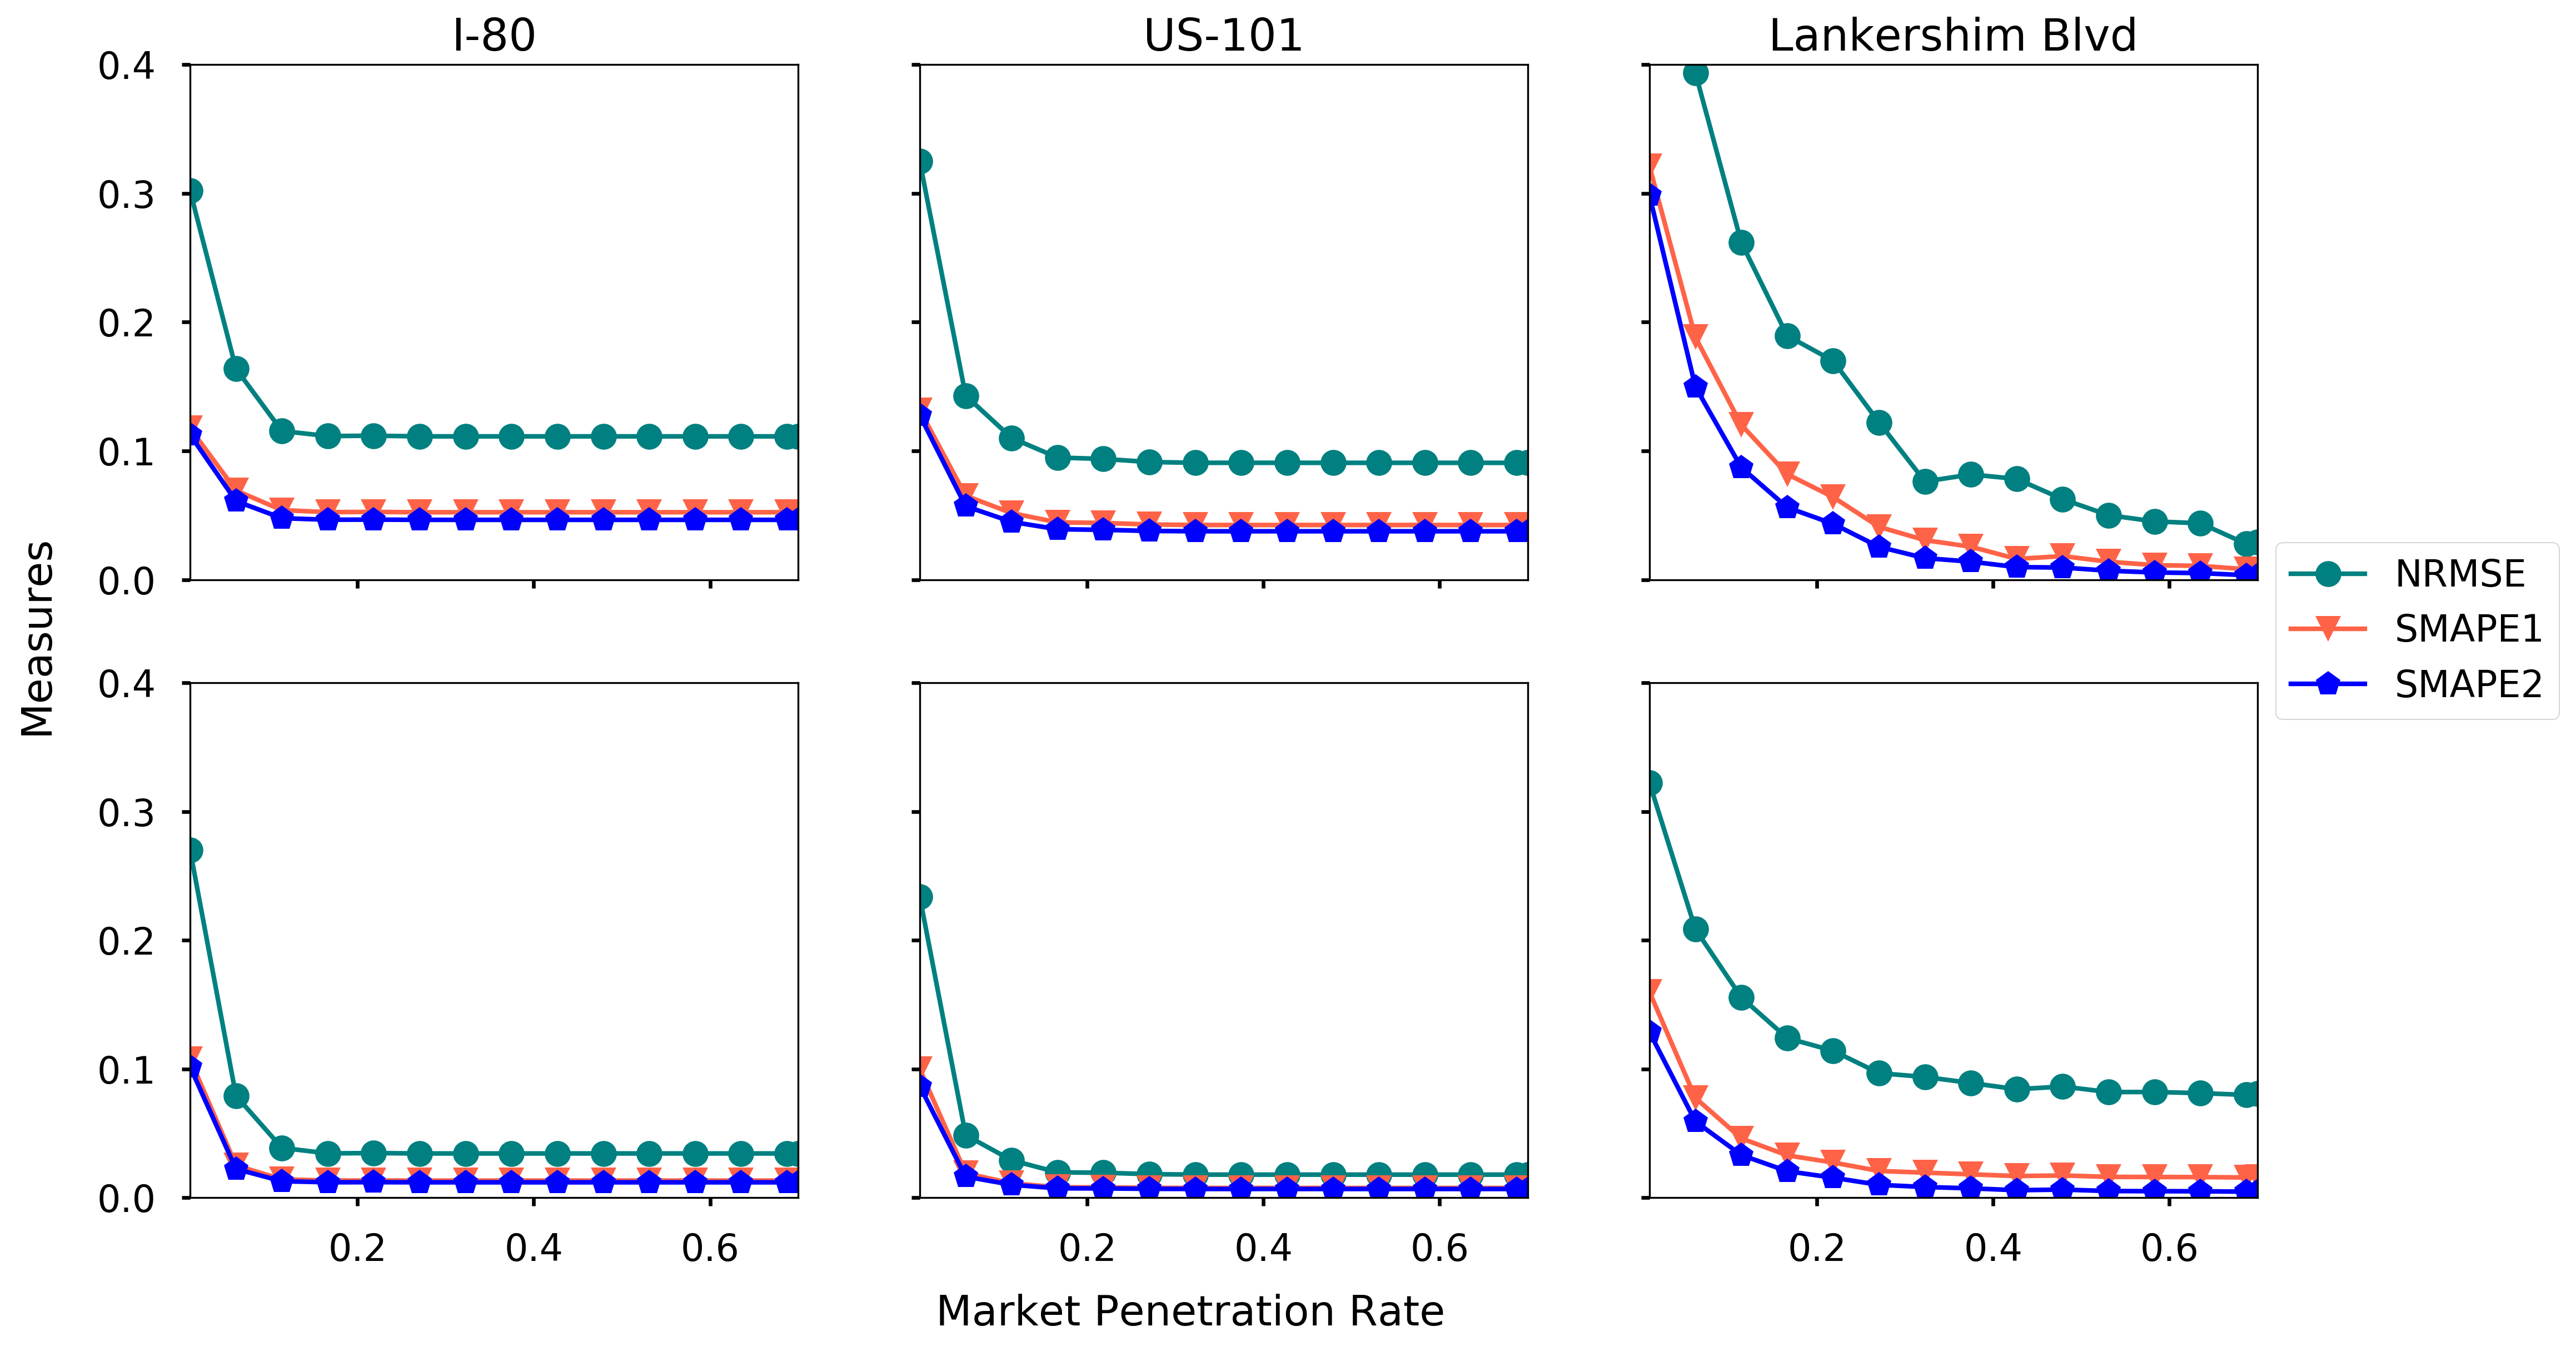

In [199]:
mp_list = np.linspace(0.01, 1, 20)[:14].tolist() + [0.7]
kNRMSEs = np.zeros((3, len(mp_list)))
kSMAPE1s = np.zeros((3, len(mp_list)))
kSMAPE2s = np.zeros((3, len(mp_list)))
vNRMSEs = np.zeros((3, len(mp_list)))
vSMAPE1s = np.zeros((3, len(mp_list)))
vSMAPE2s = np.zeros((3, len(mp_list)))
for idx, mp in enumerate(mp_list):
    [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3] = mp_res_dict[mp]
    kNRMSEs[0, idx] = k_df1.mean(axis=0)['NRMSE']
    kNRMSEs[1, idx] = k_df2.mean(axis=0)['NRMSE']
    kNRMSEs[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['NRMSE']
    kSMAPE1s[0, idx] = k_df1.mean(axis=0)['SMAPE1']
    kSMAPE1s[1, idx] = k_df2.mean(axis=0)['SMAPE1']
    kSMAPE1s[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']
    kSMAPE2s[0, idx] = k_df1.mean(axis=0)['SMAPE2']
    kSMAPE2s[1, idx] = k_df2.mean(axis=0)['SMAPE2']
    kSMAPE2s[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE2']
    vNRMSEs[0, idx] = v_df1.mean(axis=0)['NRMSE']
    vNRMSEs[1, idx] = v_df2.mean(axis=0)['NRMSE']
    vNRMSEs[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['NRMSE']
    vSMAPE1s[0, idx] = v_df1.mean(axis=0)['SMAPE1']
    vSMAPE1s[1, idx] = v_df2.mean(axis=0)['SMAPE1']
    vSMAPE1s[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']
    vSMAPE2s[0, idx] = v_df1.mean(axis=0)['SMAPE2']
    vSMAPE2s[1, idx] = v_df2.mean(axis=0)['SMAPE2']
    vSMAPE2s[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE2']

fig, axes = plt.subplots(2,3,  figsize=(16,9), sharex = True, sharey = True, dpi=300)
axes[0][0].plot(mp_list, kNRMSEs[0, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[0][1].plot(mp_list, kNRMSEs[1, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[0][2].plot(mp_list, kNRMSEs[2, :], color = color_list[0], linewidth = 2, marker = marker_list[0], label = 'NRMSE')
axes[0][0].plot(mp_list, kSMAPE1s[0, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[0][1].plot(mp_list, kSMAPE1s[1, :], color = color_list[1], linewidth =2, marker = marker_list[1])
axes[0][2].plot(mp_list, kSMAPE1s[2, :], color = color_list[1], linewidth = 2, label = 'SMAPE1', marker = marker_list[1])
axes[0][0].plot(mp_list, kSMAPE2s[0, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[0][1].plot(mp_list, kSMAPE2s[1, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[0][2].plot(mp_list, kSMAPE2s[2, :], color = color_list[2], linewidth = 2, label = 'SMAPE2', marker = marker_list[2])
axes[1][0].plot(mp_list, vNRMSEs[0, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][1].plot(mp_list, vNRMSEs[1, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][2].plot(mp_list, vNRMSEs[2, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][0].plot(mp_list, vSMAPE1s[0, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][1].plot(mp_list, vSMAPE1s[1, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][2].plot(mp_list, vSMAPE1s[2, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][0].plot(mp_list, vSMAPE2s[0, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[1][1].plot(mp_list, vSMAPE2s[1, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[1][2].plot(mp_list, vSMAPE2s[2, :], color = color_list[2], linewidth = 2, marker = marker_list[2])

axes[0,0].set_title("I-80")
axes[0,1].set_title("US-101")
axes[0,2].set_title("Lankershim Blvd")

axes_f = axes.flatten()
for axe in axes_f:
    axe.set_xlim(0.01, 0.7)

for axe in axes_f[0:3]:
    axe.set_ylim(0.00, 0.5)
    
for axe in axes_f[3:]:
    axe.set_ylim(0.00, 0.4)
    
axes_f[2].legend(loc='center left', bbox_to_anchor=(1, -0.1))
fig.text(0.5, 0.04, 'Market Penetration Rate', ha='center', fontsize = 18)
fig.text(0.06, 0.5, 'Measures', va='center', rotation='vertical', fontsize = 18)
plt.show()

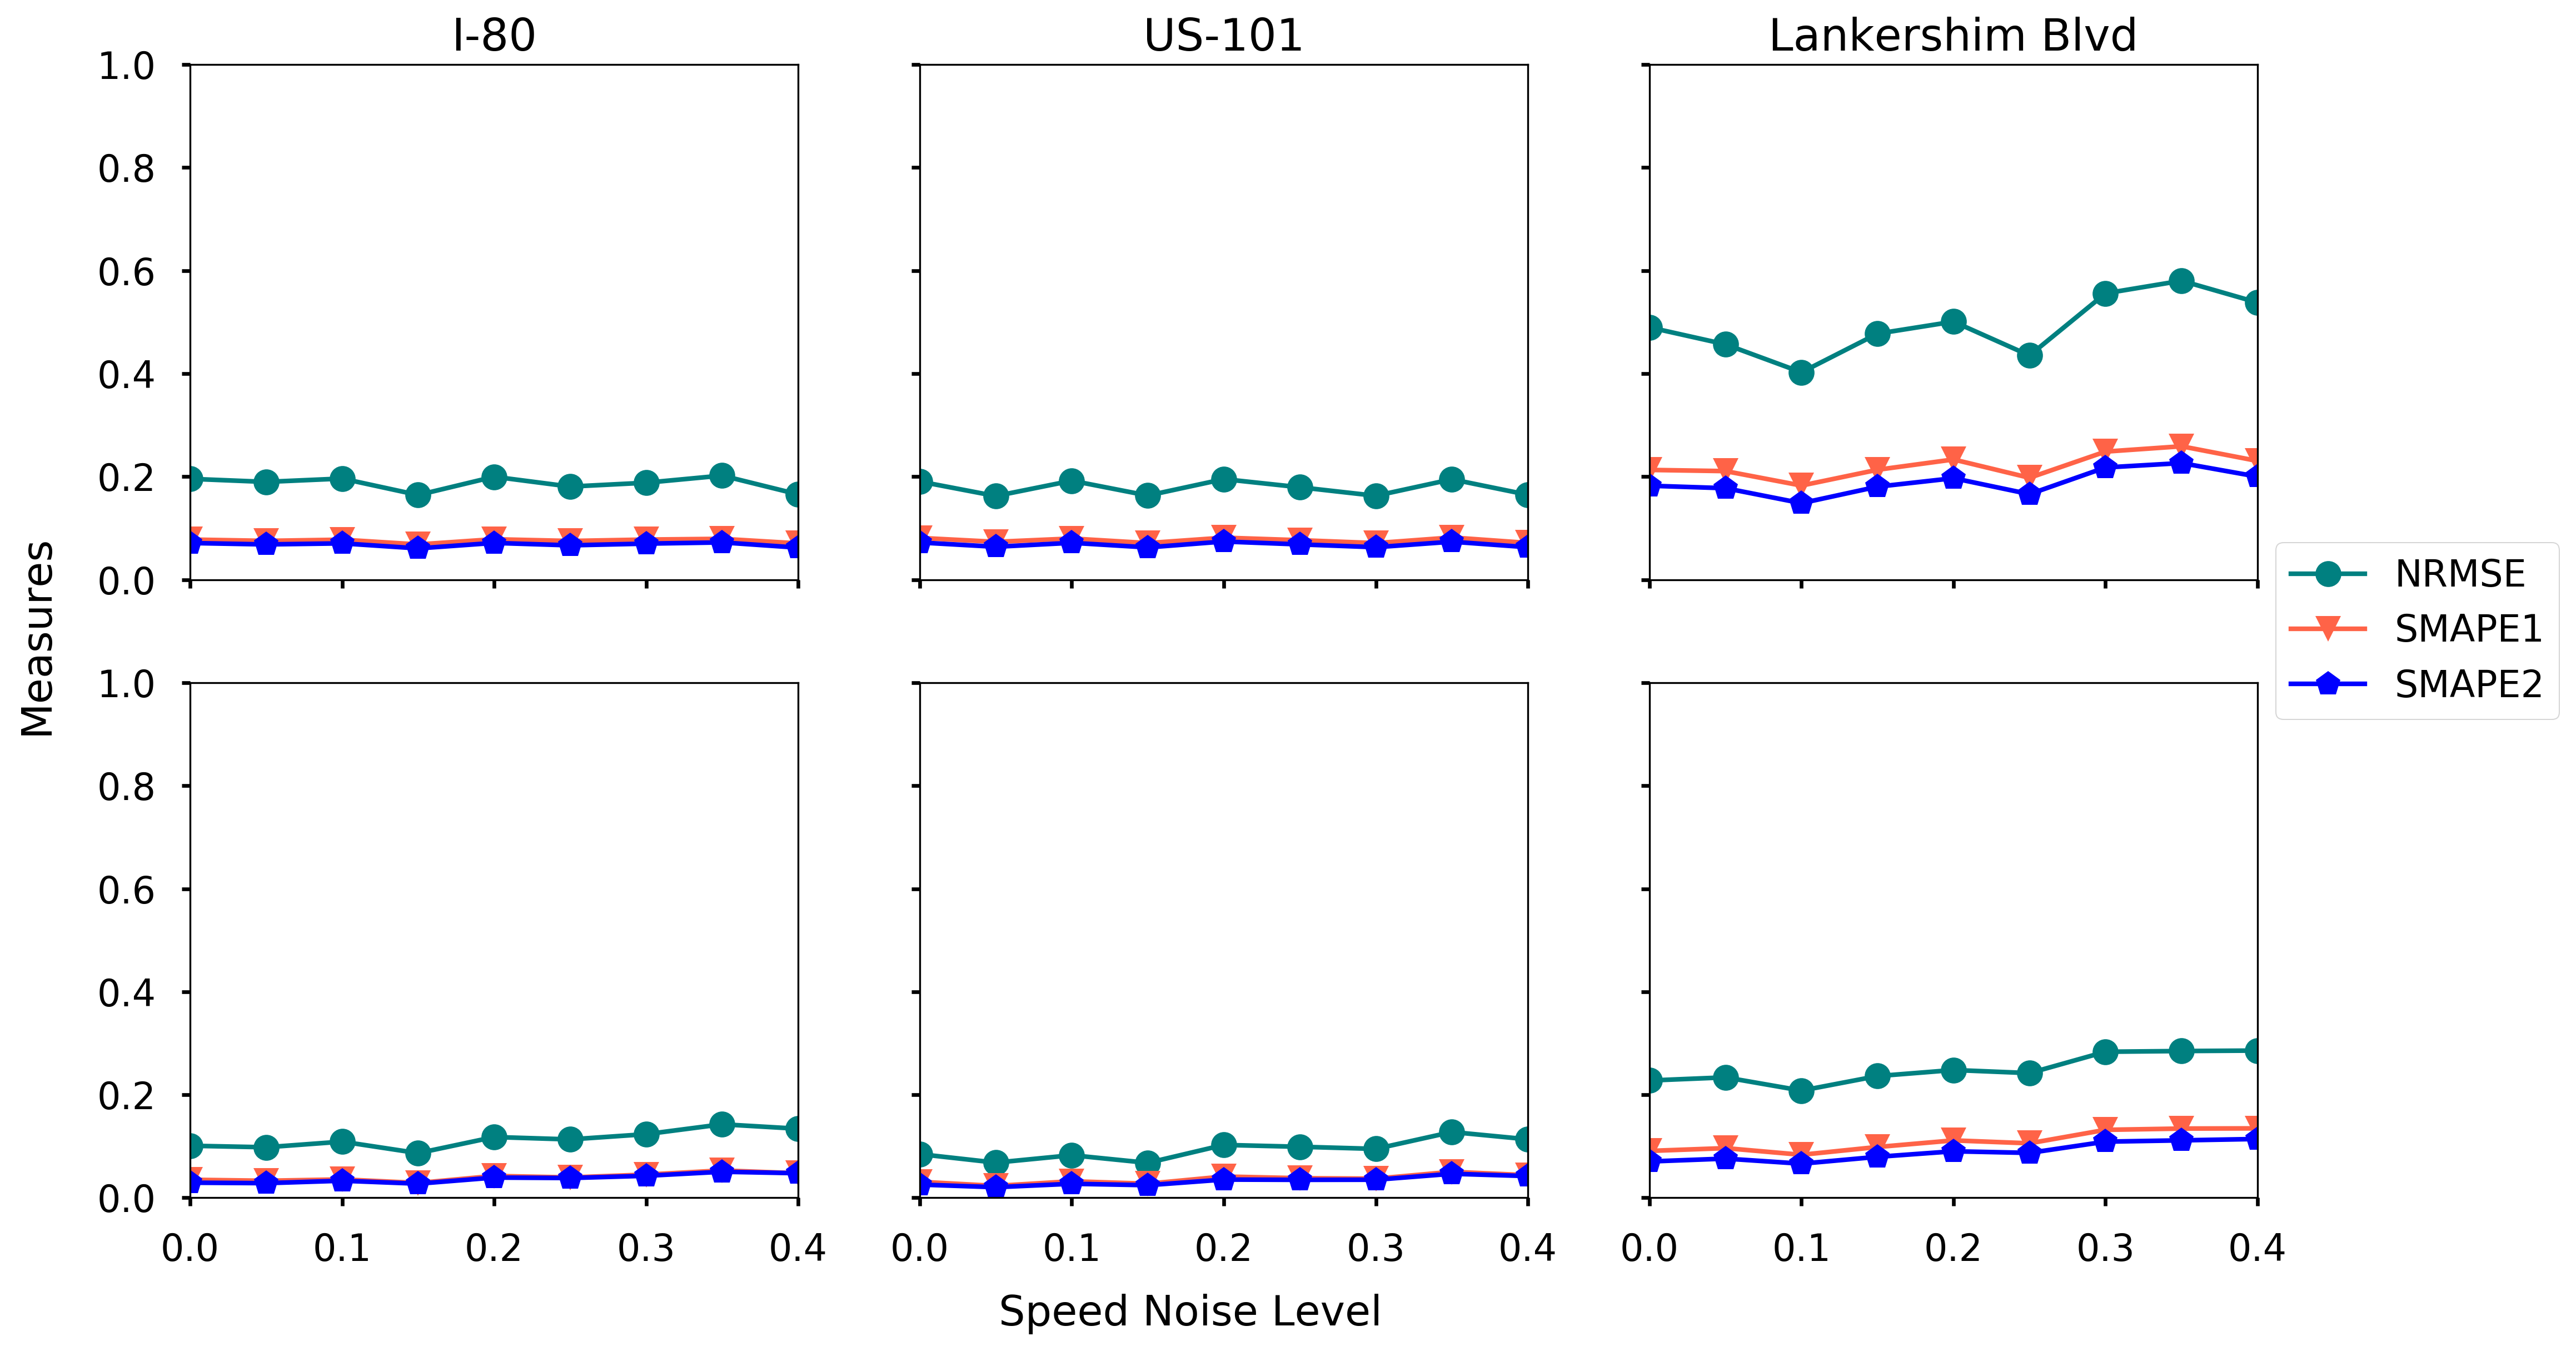

In [200]:
spn_list = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
kNRMSEs = np.zeros((3, len(spn_list)))
kSMAPE1s = np.zeros((3, len(spn_list)))
kSMAPE2s = np.zeros((3, len(spn_list)))
vNRMSEs = np.zeros((3, len(spn_list)))
vSMAPE1s = np.zeros((3, len(spn_list)))
vSMAPE2s = np.zeros((3, len(spn_list)))
for idx, spn in enumerate(spn_list):
    [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3] = spn_res_dict[spn]
    kNRMSEs[0, idx] = k_df1.mean(axis=0)['NRMSE']
    kNRMSEs[1, idx] = k_df2.mean(axis=0)['NRMSE']
    kNRMSEs[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['NRMSE']
    kSMAPE1s[0, idx] = k_df1.mean(axis=0)['SMAPE1']
    kSMAPE1s[1, idx] = k_df2.mean(axis=0)['SMAPE1']
    kSMAPE1s[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']
    kSMAPE2s[0, idx] = k_df1.mean(axis=0)['SMAPE2']
    kSMAPE2s[1, idx] = k_df2.mean(axis=0)['SMAPE2']
    kSMAPE2s[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE2']
    vNRMSEs[0, idx] = v_df1.mean(axis=0)['NRMSE']
    vNRMSEs[1, idx] = v_df2.mean(axis=0)['NRMSE']
    vNRMSEs[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['NRMSE']
    vSMAPE1s[0, idx] = v_df1.mean(axis=0)['SMAPE1']
    vSMAPE1s[1, idx] = v_df2.mean(axis=0)['SMAPE1']
    vSMAPE1s[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']
    vSMAPE2s[0, idx] = v_df1.mean(axis=0)['SMAPE2']
    vSMAPE2s[1, idx] = v_df2.mean(axis=0)['SMAPE2']
    vSMAPE2s[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE2']

fig, axes = plt.subplots(2,3,  figsize=(16,9), sharex = True, sharey = True, dpi=300)
axes[0][0].plot(spn_list, kNRMSEs[0, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[0][1].plot(spn_list, kNRMSEs[1, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[0][2].plot(spn_list, kNRMSEs[2, :], color = color_list[0], linewidth = 2, marker = marker_list[0], label = 'NRMSE')
axes[0][0].plot(spn_list, kSMAPE1s[0, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[0][1].plot(spn_list, kSMAPE1s[1, :], color = color_list[1], linewidth =2, marker = marker_list[1])
axes[0][2].plot(spn_list, kSMAPE1s[2, :], color = color_list[1], linewidth = 2, label = 'SMAPE1', marker = marker_list[1])
axes[0][0].plot(spn_list, kSMAPE2s[0, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[0][1].plot(spn_list, kSMAPE2s[1, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[0][2].plot(spn_list, kSMAPE2s[2, :], color = color_list[2], linewidth = 2, label = 'SMAPE2', marker = marker_list[2])
axes[1][0].plot(spn_list, vNRMSEs[0, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][1].plot(spn_list, vNRMSEs[1, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][2].plot(spn_list, vNRMSEs[2, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][0].plot(spn_list, vSMAPE1s[0, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][1].plot(spn_list, vSMAPE1s[1, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][2].plot(spn_list, vSMAPE1s[2, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][0].plot(spn_list, vSMAPE2s[0, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[1][1].plot(spn_list, vSMAPE2s[1, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[1][2].plot(spn_list, vSMAPE2s[2, :], color = color_list[2], linewidth = 2, marker = marker_list[2])

axes[0,0].set_title("I-80")
axes[0,1].set_title("US-101")
axes[0,2].set_title("Lankershim Blvd")

axes_f = axes.flatten()
for axe in axes_f:
    axe.set_xlim(0.0, 0.4)

    
for axe in axes_f:
    axe.set_ylim(0.00, 1)
    
axes_f[2].legend(loc='center left', bbox_to_anchor=(1, -0.1))
fig.text(0.5, 0.04, 'Speed Noise Level', ha='center', fontsize = 18)
fig.text(0.06, 0.5, 'Measures', va='center', rotation='vertical', fontsize = 18)
plt.show()

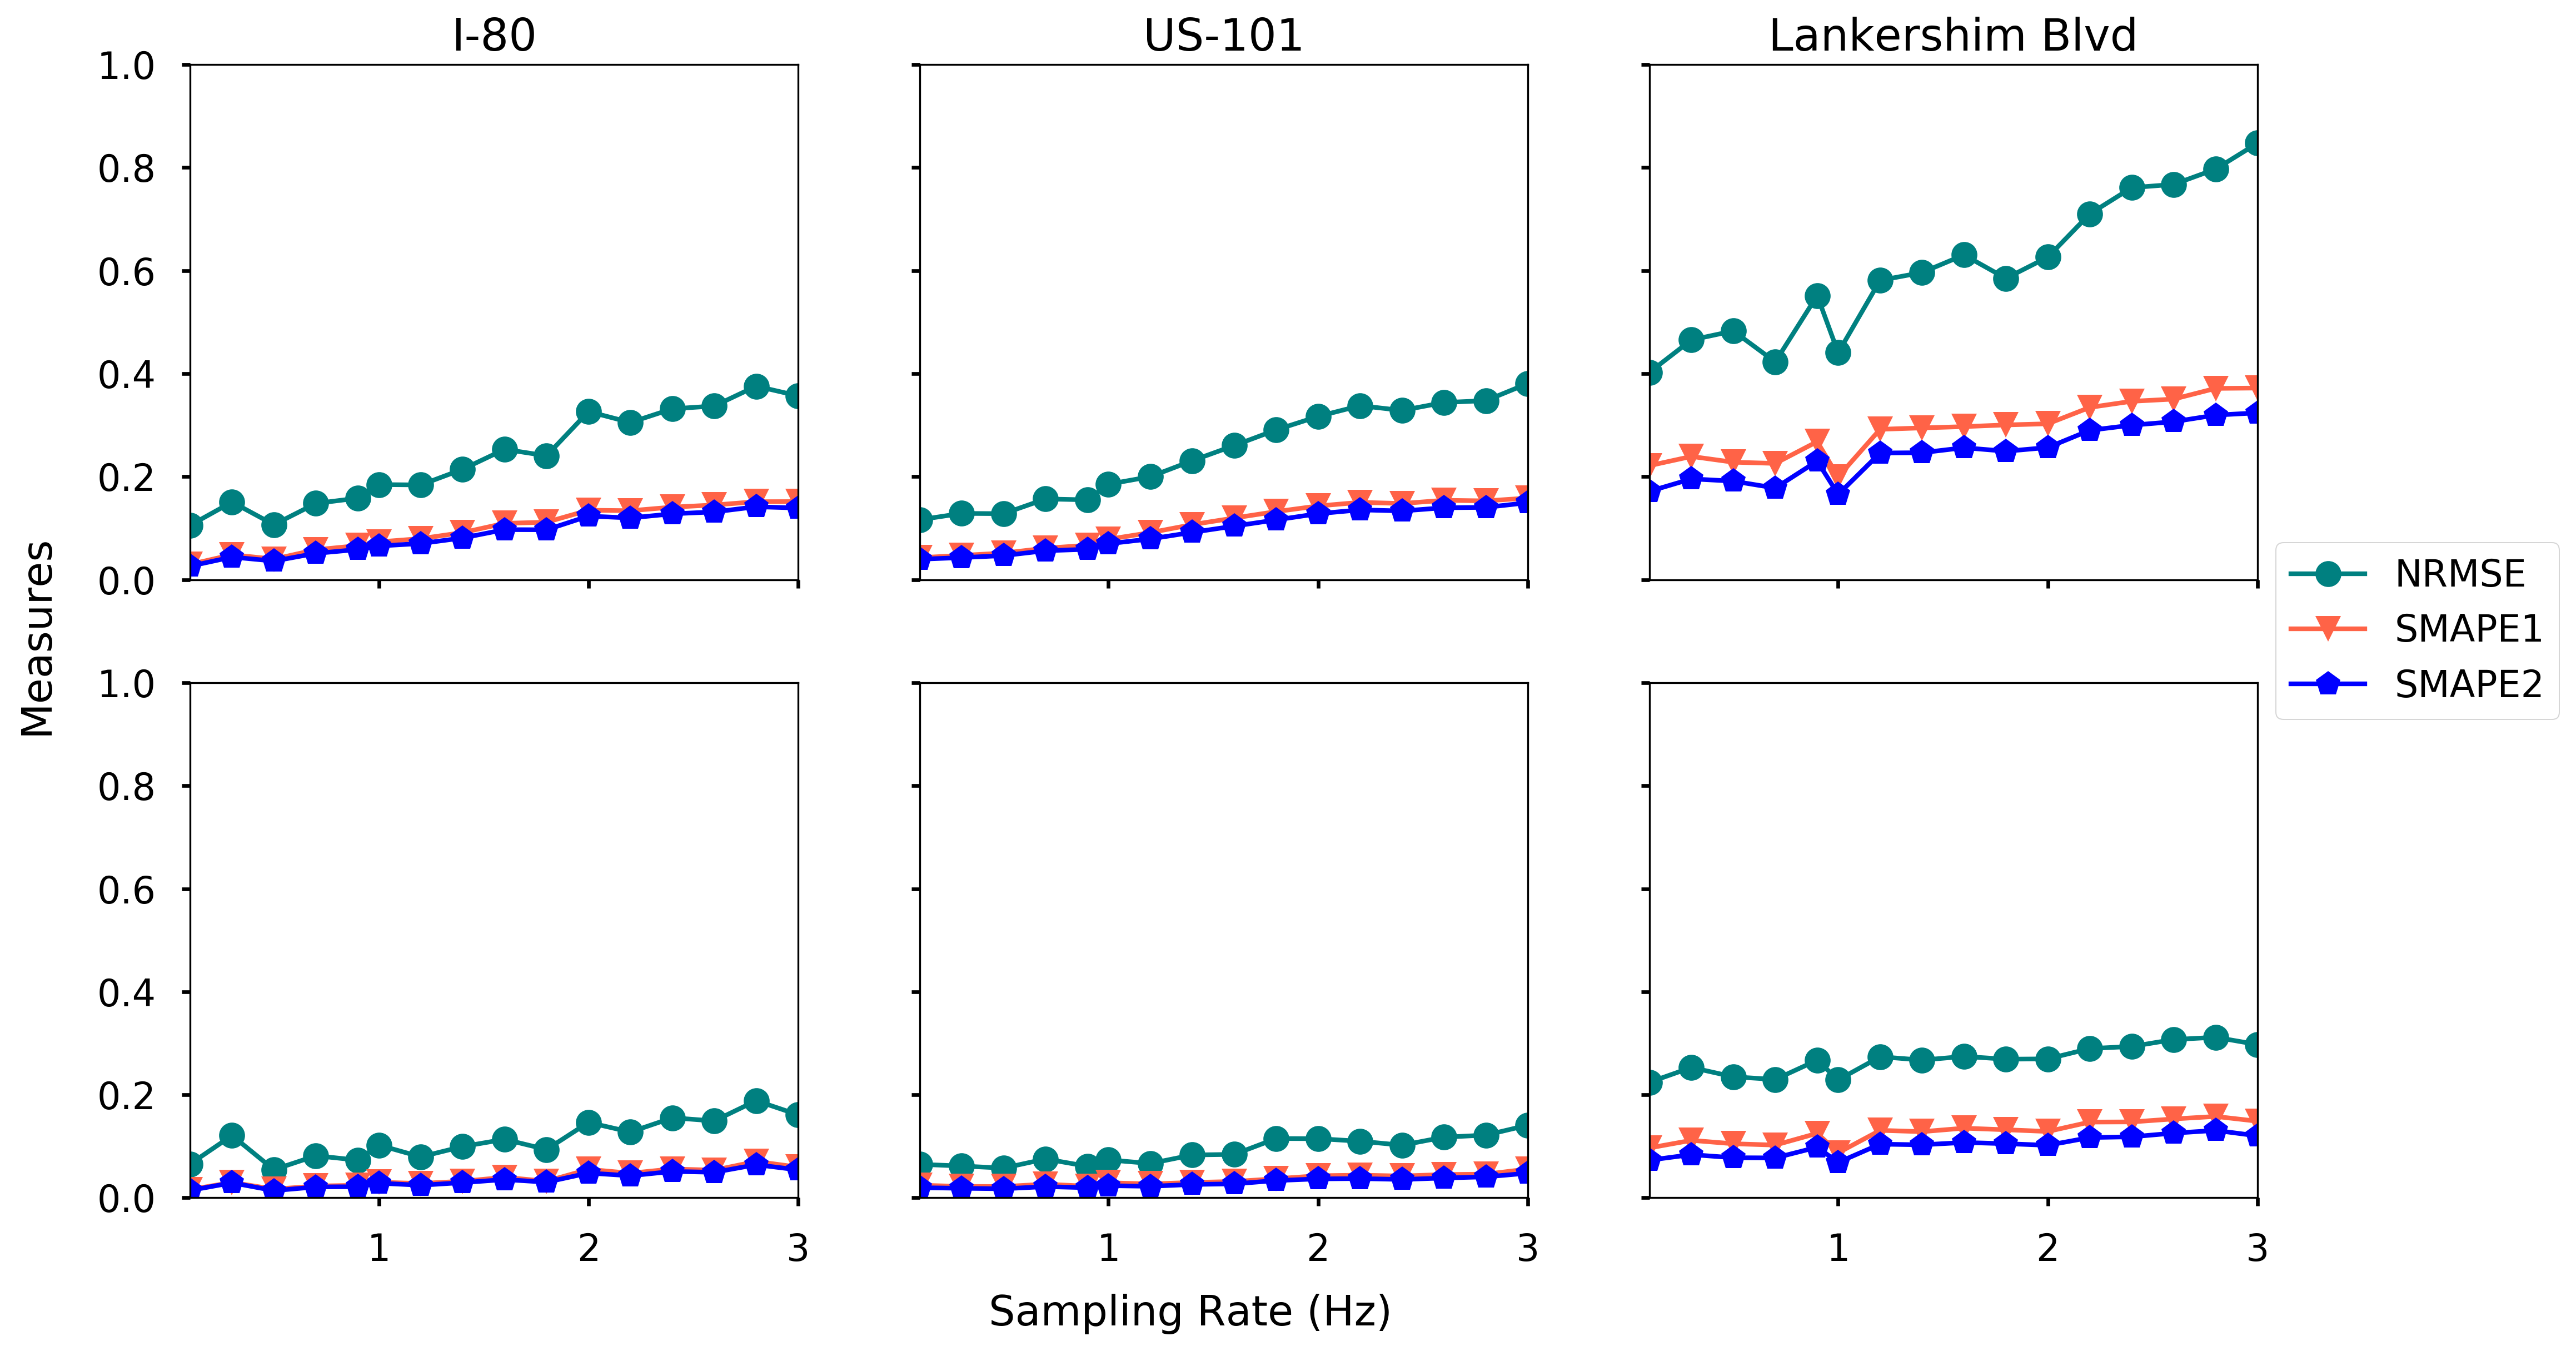

In [201]:
sr_list = [100, 300, 500, 700, 900, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
kNRMSEs = np.zeros((3, len(sr_list)))
kSMAPE1s = np.zeros((3, len(sr_list)))
kSMAPE2s = np.zeros((3, len(sr_list)))
vNRMSEs = np.zeros((3, len(sr_list)))
vSMAPE1s = np.zeros((3, len(sr_list)))
vSMAPE2s = np.zeros((3, len(sr_list)))
for idx, sr in enumerate(sr_list):
    [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3] = sr_res_dict[sr]
    kNRMSEs[0, idx] = k_df1.mean(axis=0)['NRMSE']
    kNRMSEs[1, idx] = k_df2.mean(axis=0)['NRMSE']
    kNRMSEs[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['NRMSE']
    kSMAPE1s[0, idx] = k_df1.mean(axis=0)['SMAPE1']
    kSMAPE1s[1, idx] = k_df2.mean(axis=0)['SMAPE1']
    kSMAPE1s[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']
    kSMAPE2s[0, idx] = k_df1.mean(axis=0)['SMAPE2']
    kSMAPE2s[1, idx] = k_df2.mean(axis=0)['SMAPE2']
    kSMAPE2s[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE2']
    vNRMSEs[0, idx] = v_df1.mean(axis=0)['NRMSE']
    vNRMSEs[1, idx] = v_df2.mean(axis=0)['NRMSE']
    vNRMSEs[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['NRMSE']
    vSMAPE1s[0, idx] = v_df1.mean(axis=0)['SMAPE1']
    vSMAPE1s[1, idx] = v_df2.mean(axis=0)['SMAPE1']
    vSMAPE1s[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']
    vSMAPE2s[0, idx] = v_df1.mean(axis=0)['SMAPE2']
    vSMAPE2s[1, idx] = v_df2.mean(axis=0)['SMAPE2']
    vSMAPE2s[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE2']

sr_list = np.array(sr_list) / 1000    

fig, axes = plt.subplots(2,3,  figsize=(16,9), sharex = True, sharey = True, dpi=300)
axes[0][0].plot(sr_list, kNRMSEs[0, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[0][1].plot(sr_list, kNRMSEs[1, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[0][2].plot(sr_list, kNRMSEs[2, :], color = color_list[0], linewidth = 2, marker = marker_list[0], label = 'NRMSE')
axes[0][0].plot(sr_list, kSMAPE1s[0, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[0][1].plot(sr_list, kSMAPE1s[1, :], color = color_list[1], linewidth =2, marker = marker_list[1])
axes[0][2].plot(sr_list, kSMAPE1s[2, :], color = color_list[1], linewidth = 2, label = 'SMAPE1', marker = marker_list[1])
axes[0][0].plot(sr_list, kSMAPE2s[0, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[0][1].plot(sr_list, kSMAPE2s[1, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[0][2].plot(sr_list, kSMAPE2s[2, :], color = color_list[2], linewidth = 2, label = 'SMAPE2', marker = marker_list[2])
axes[1][0].plot(sr_list, vNRMSEs[0, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][1].plot(sr_list, vNRMSEs[1, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][2].plot(sr_list, vNRMSEs[2, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][0].plot(sr_list, vSMAPE1s[0, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][1].plot(sr_list, vSMAPE1s[1, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][2].plot(sr_list, vSMAPE1s[2, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][0].plot(sr_list, vSMAPE2s[0, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[1][1].plot(sr_list, vSMAPE2s[1, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[1][2].plot(sr_list, vSMAPE2s[2, :], color = color_list[2], linewidth = 2, marker = marker_list[2])


axes_f = axes.flatten()
for axe in axes_f:
    axe.set_xlim(0.1, 3)


for axe in axes_f:
    axe.set_ylim(0.00, 1)

axes[0,0].set_title("I-80")
axes[0,1].set_title("US-101")
axes[0,2].set_title("Lankershim Blvd")    

axes_f[2].legend(loc='center left', bbox_to_anchor=(1, -0.1))
fig.text(0.5, 0.04, 'Sampling Rate (Hz)', ha='center', fontsize = 18)
fig.text(0.06, 0.5, 'Measures', va='center', rotation='vertical', fontsize = 18)
plt.show()

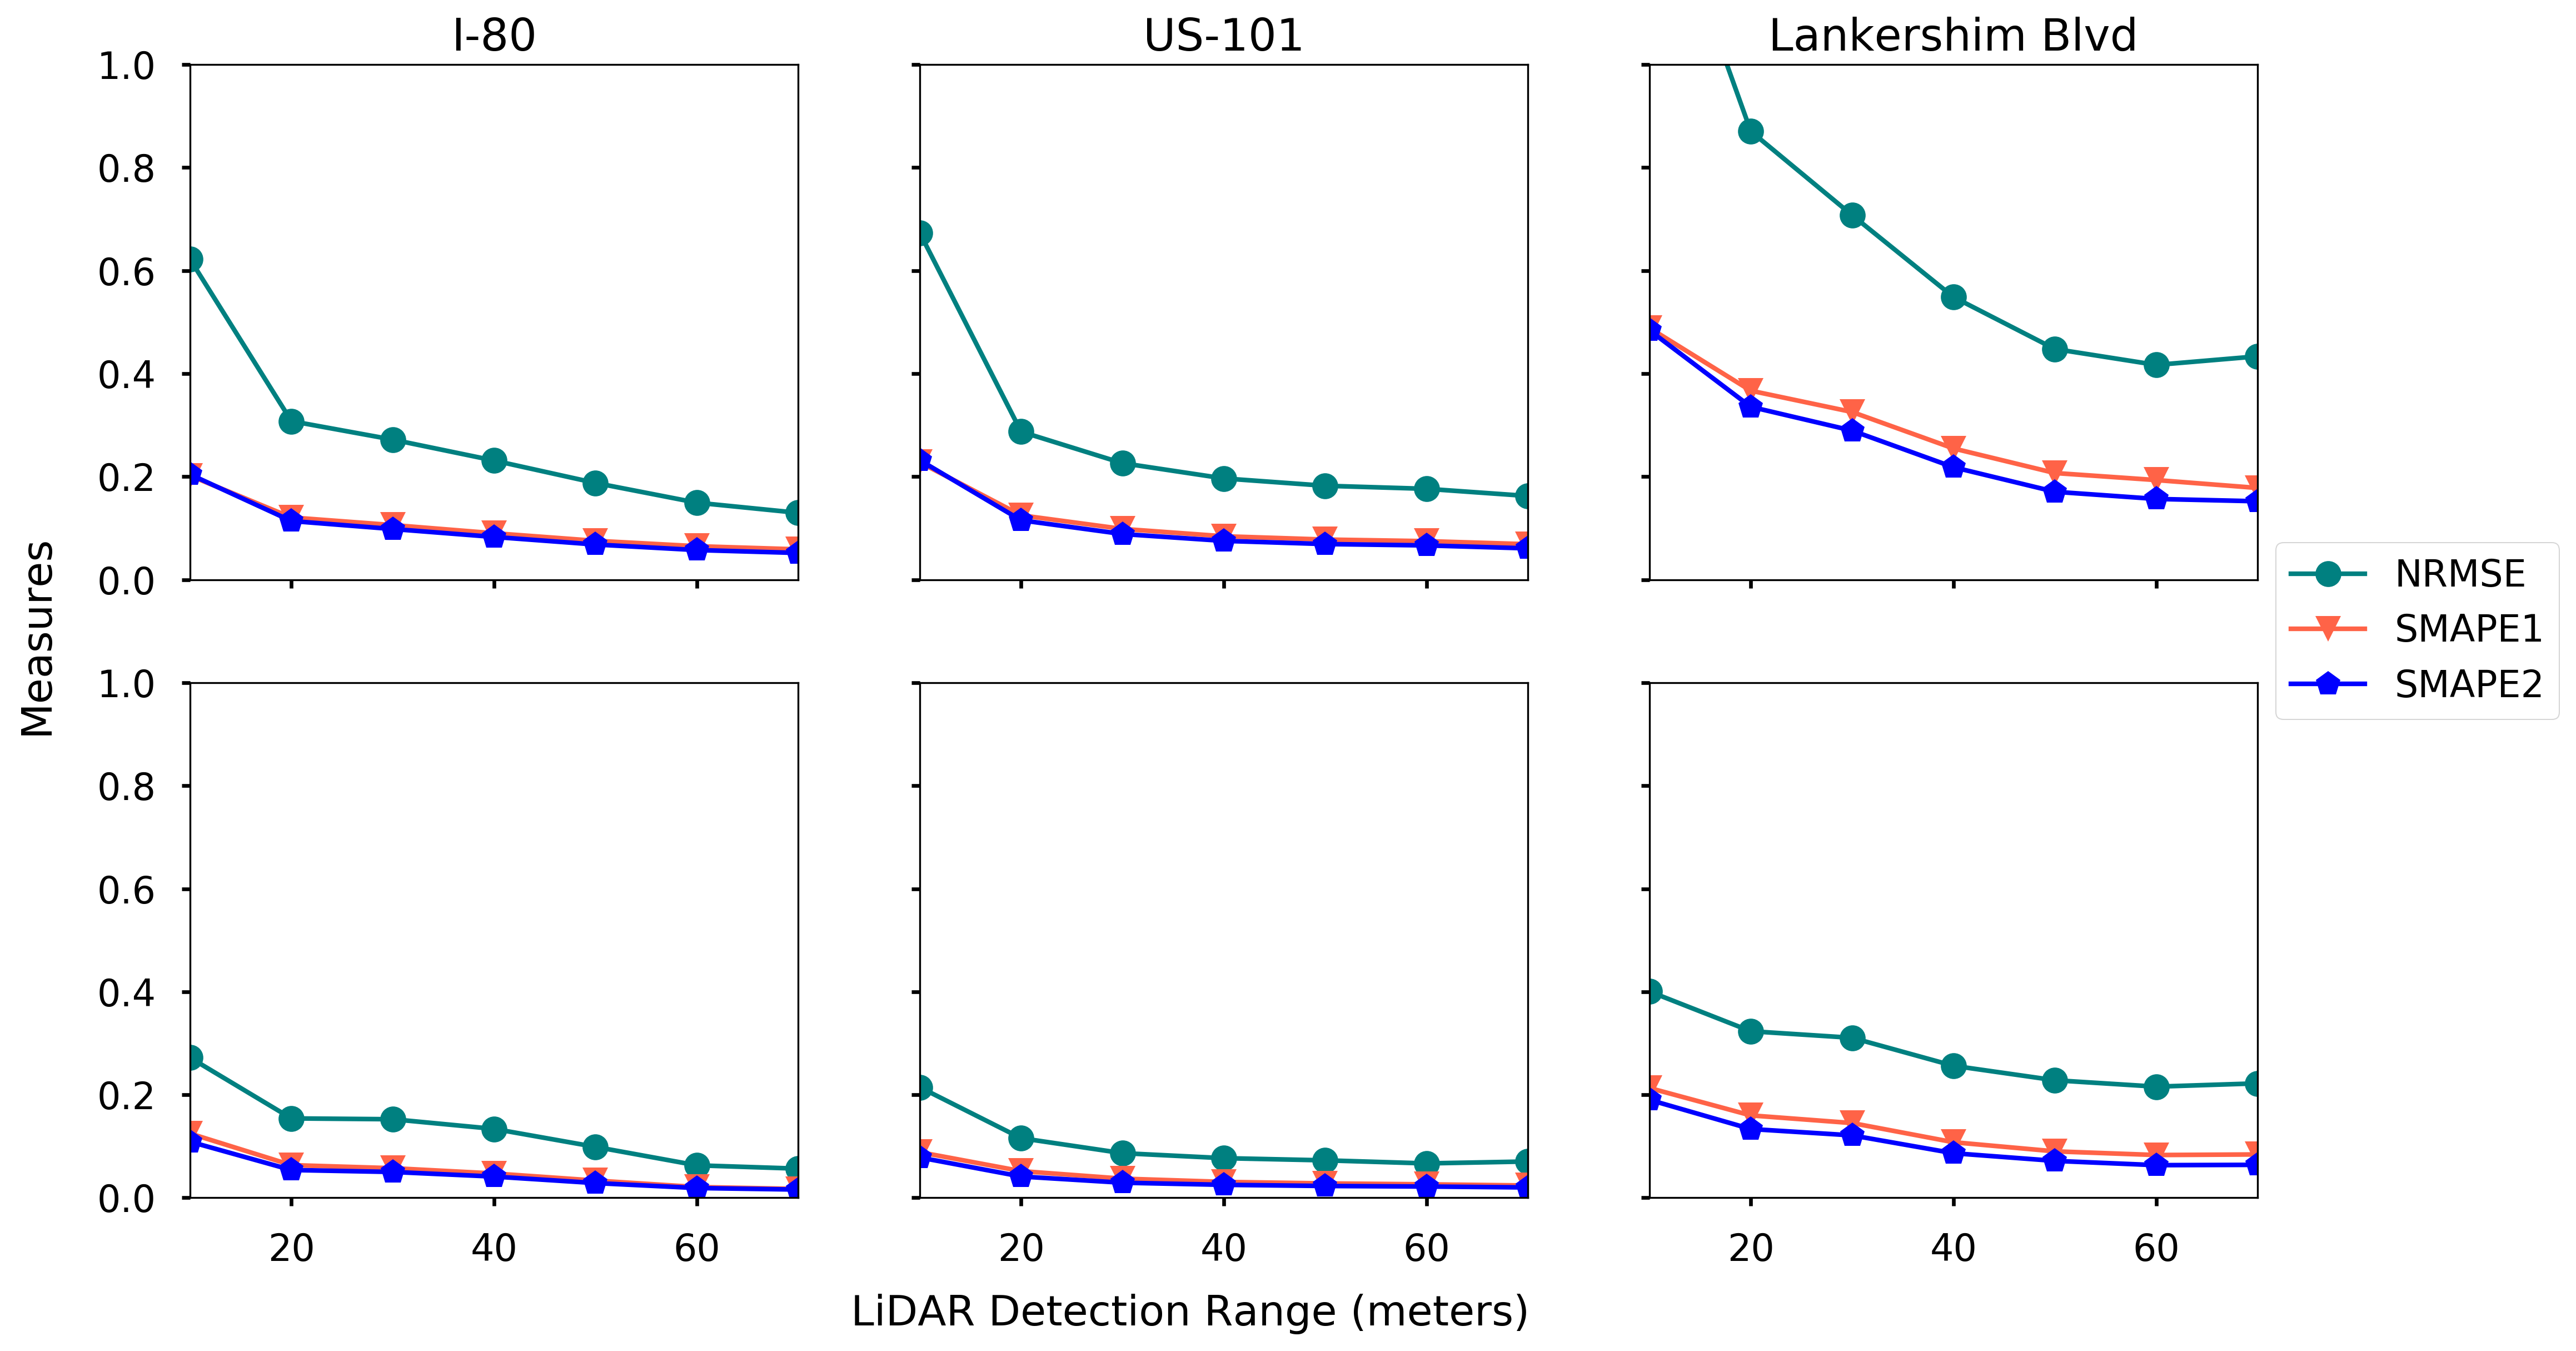

In [202]:
mt_list = [10, 20, 30, 40, 50, 60, 70]
kNRMSEs = np.zeros((3, len(mt_list)))
kSMAPE1s = np.zeros((3, len(mt_list)))
kSMAPE2s = np.zeros((3, len(mt_list)))
vNRMSEs = np.zeros((3, len(mt_list)))
vSMAPE1s = np.zeros((3, len(mt_list)))
vSMAPE2s = np.zeros((3, len(mt_list)))
for idx, mt in enumerate(mt_list):
    [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3] = mt_res_dict[mt]
    kNRMSEs[0, idx] = k_df1.mean(axis=0)['NRMSE']
    kNRMSEs[1, idx] = k_df2.mean(axis=0)['NRMSE']
    kNRMSEs[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['NRMSE']
    kSMAPE1s[0, idx] = k_df1.mean(axis=0)['SMAPE1']
    kSMAPE1s[1, idx] = k_df2.mean(axis=0)['SMAPE1']
    kSMAPE1s[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']
    kSMAPE2s[0, idx] = k_df1.mean(axis=0)['SMAPE2']
    kSMAPE2s[1, idx] = k_df2.mean(axis=0)['SMAPE2']
    kSMAPE2s[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE2']
    vNRMSEs[0, idx] = v_df1.mean(axis=0)['NRMSE']
    vNRMSEs[1, idx] = v_df2.mean(axis=0)['NRMSE']
    vNRMSEs[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['NRMSE']
    vSMAPE1s[0, idx] = v_df1.mean(axis=0)['SMAPE1']
    vSMAPE1s[1, idx] = v_df2.mean(axis=0)['SMAPE1']
    vSMAPE1s[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']
    vSMAPE2s[0, idx] = v_df1.mean(axis=0)['SMAPE2']
    vSMAPE2s[1, idx] = v_df2.mean(axis=0)['SMAPE2']
    vSMAPE2s[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE2']

fig, axes = plt.subplots(2,3,  figsize=(16,9), sharex = True, sharey = True, dpi=300)
axes[0][0].plot(mt_list, kNRMSEs[0, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[0][1].plot(mt_list, kNRMSEs[1, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[0][2].plot(mt_list, kNRMSEs[2, :], color = color_list[0], linewidth = 2, marker = marker_list[0], label = 'NRMSE')
axes[0][0].plot(mt_list, kSMAPE1s[0, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[0][1].plot(mt_list, kSMAPE1s[1, :], color = color_list[1], linewidth =2, marker = marker_list[1])
axes[0][2].plot(mt_list, kSMAPE1s[2, :], color = color_list[1], linewidth = 2, label = 'SMAPE1', marker = marker_list[1])
axes[0][0].plot(mt_list, kSMAPE2s[0, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[0][1].plot(mt_list, kSMAPE2s[1, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[0][2].plot(mt_list, kSMAPE2s[2, :], color = color_list[2], linewidth = 2, label = 'SMAPE2', marker = marker_list[2])
axes[1][0].plot(mt_list, vNRMSEs[0, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][1].plot(mt_list, vNRMSEs[1, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][2].plot(mt_list, vNRMSEs[2, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][0].plot(mt_list, vSMAPE1s[0, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][1].plot(mt_list, vSMAPE1s[1, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][2].plot(mt_list, vSMAPE1s[2, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][0].plot(mt_list, vSMAPE2s[0, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[1][1].plot(mt_list, vSMAPE2s[1, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[1][2].plot(mt_list, vSMAPE2s[2, :], color = color_list[2], linewidth = 2, marker = marker_list[2])


axes_f = axes.flatten()
for axe in axes_f:
    axe.set_xlim(10, 70)


for axe in axes_f:
    axe.set_ylim(0.00, 1)

axes[0,0].set_title("I-80")
axes[0,1].set_title("US-101")
axes[0,2].set_title("Lankershim Blvd")    

axes_f[2].legend(loc='center left', bbox_to_anchor=(1, -0.1))
fig.text(0.5, 0.04, 'LiDAR Detection Range (meters)', ha='center', fontsize = 18)
fig.text(0.06, 0.5, 'Measures', va='center', rotation='vertical', fontsize = 18)
plt.show()

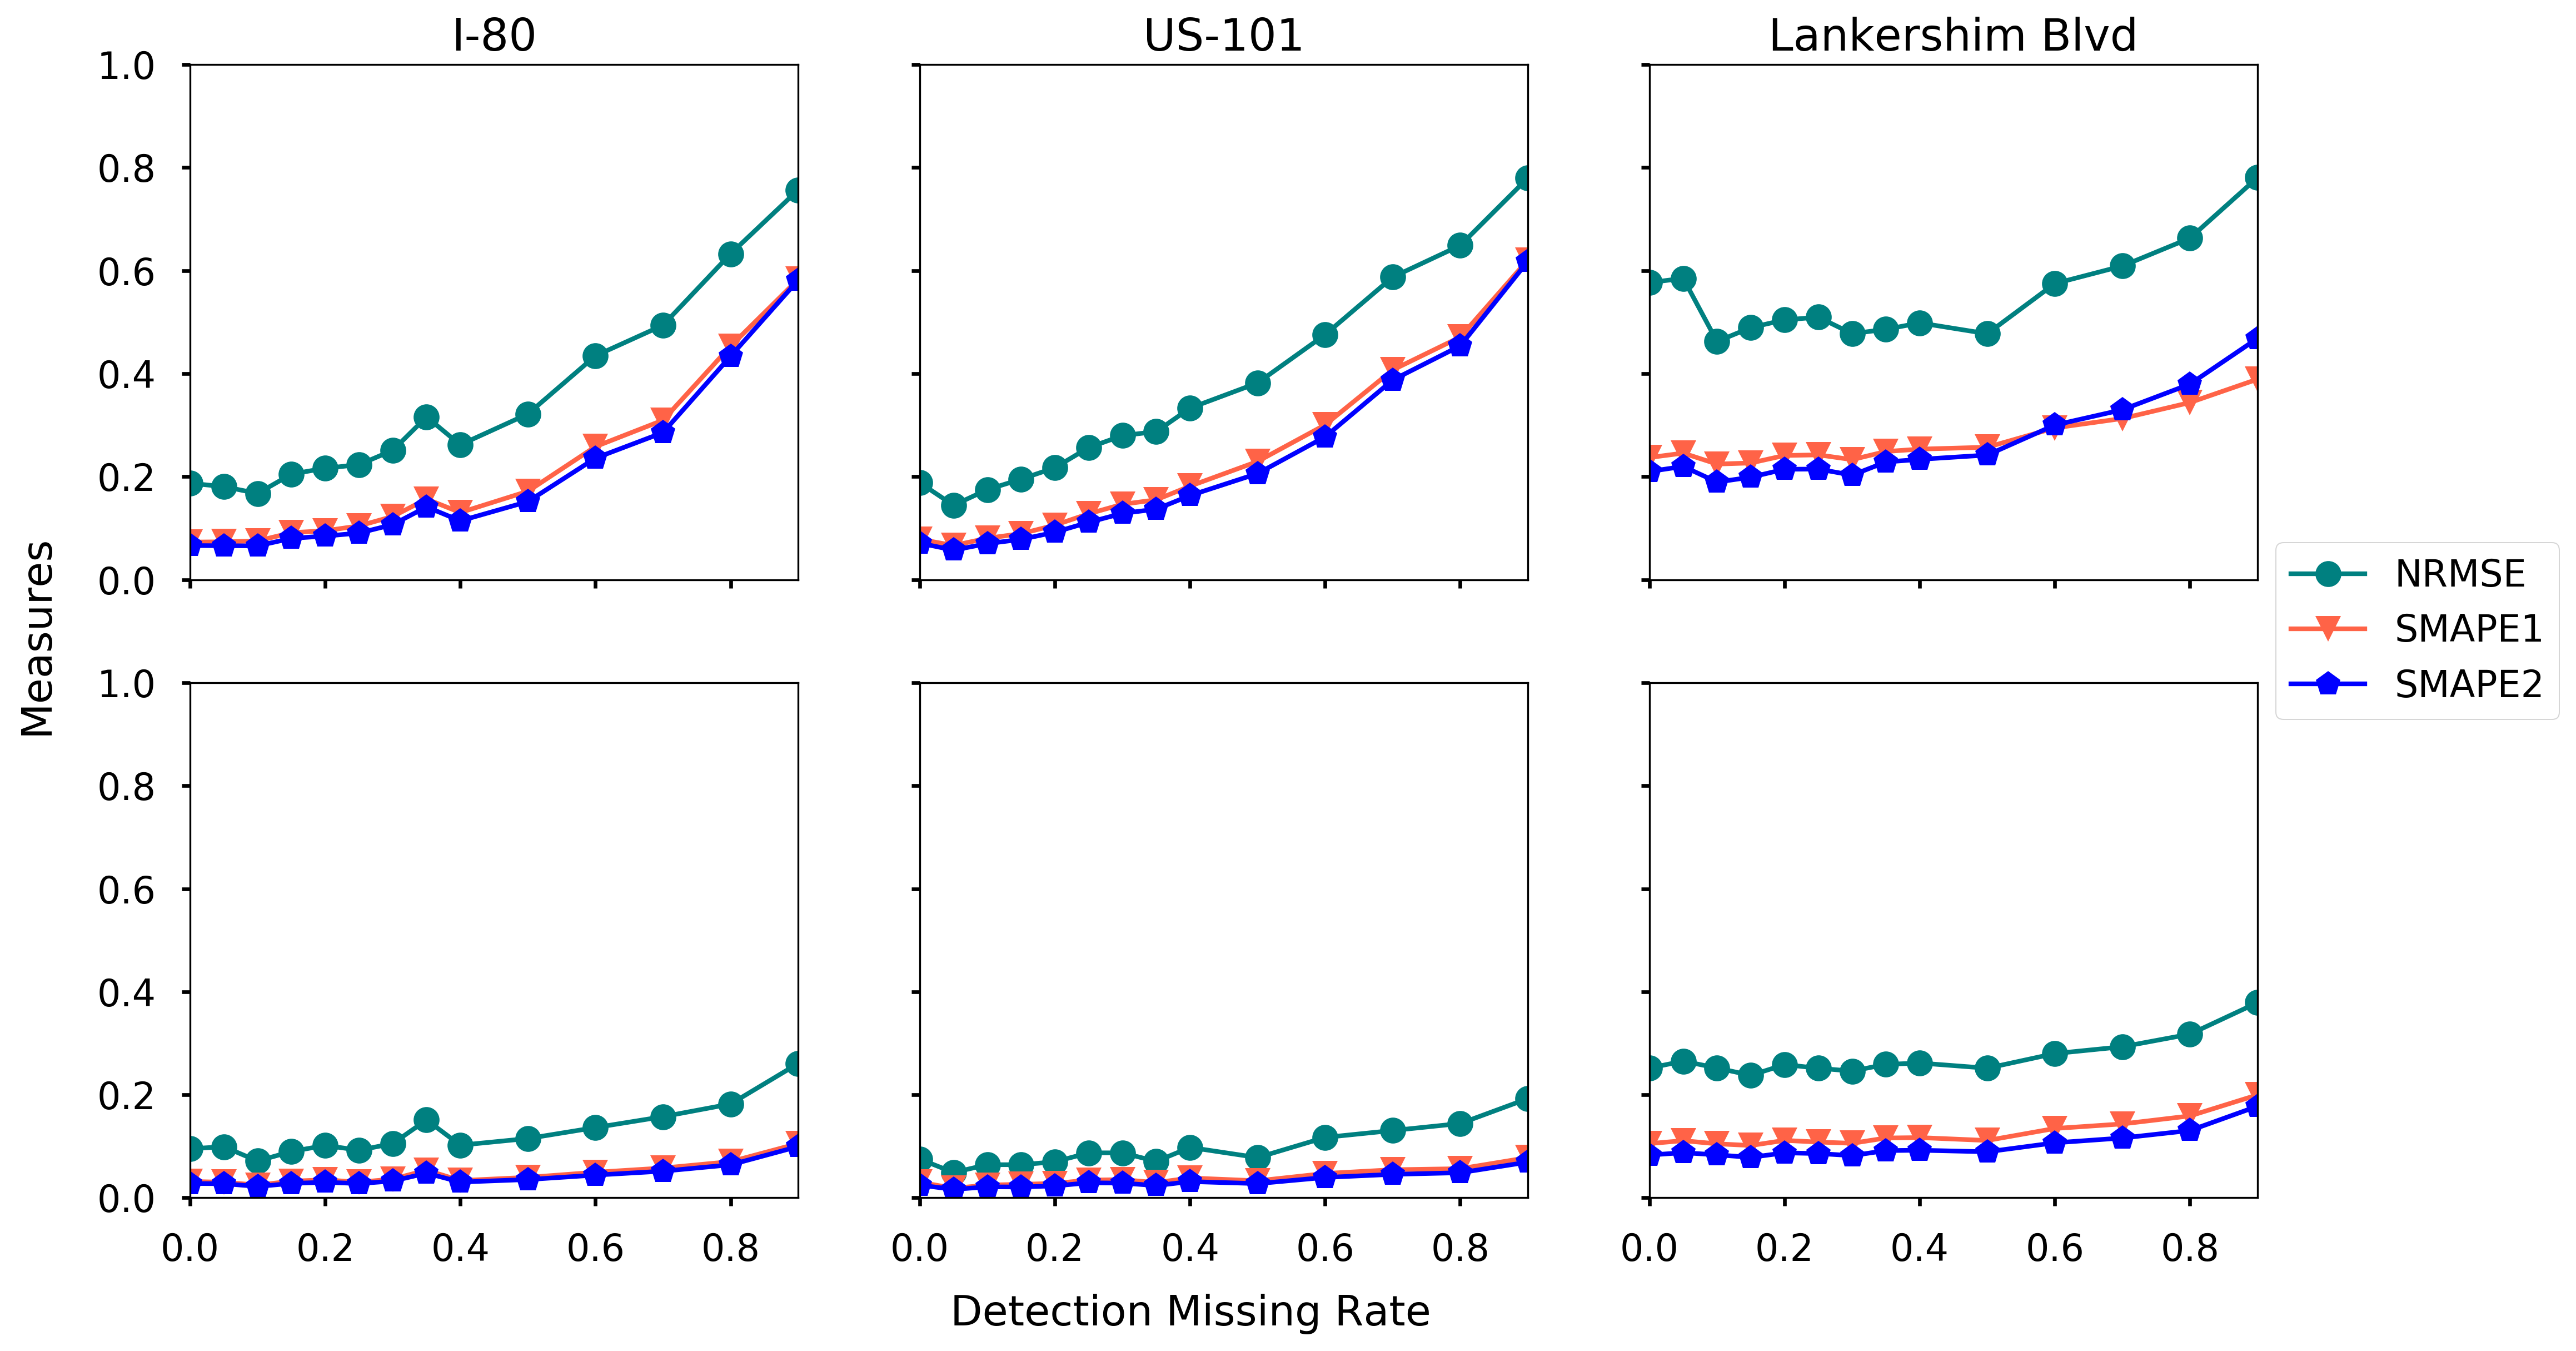

In [258]:
miss_list = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
kNRMSEs = np.zeros((3, len(miss_list)))
kSMAPE1s = np.zeros((3, len(miss_list)))
kSMAPE2s = np.zeros((3, len(miss_list)))
vNRMSEs = np.zeros((3, len(miss_list)))
vSMAPE1s = np.zeros((3, len(miss_list)))
vSMAPE2s = np.zeros((3, len(miss_list)))
for idx, miss in enumerate(miss_list):
    [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3] = miss_result_dict[miss]
    kNRMSEs[0, idx] = k_df1.mean(axis=0)['NRMSE']
    kNRMSEs[1, idx] = k_df2.mean(axis=0)['NRMSE']
    kNRMSEs[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['NRMSE']
    kSMAPE1s[0, idx] = k_df1.mean(axis=0)['SMAPE1']
    kSMAPE1s[1, idx] = k_df2.mean(axis=0)['SMAPE1']
    kSMAPE1s[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']
    kSMAPE2s[0, idx] = k_df1.mean(axis=0)['SMAPE2']
    kSMAPE2s[1, idx] = k_df2.mean(axis=0)['SMAPE2']
    kSMAPE2s[2, idx] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE2']
    vNRMSEs[0, idx] = v_df1.mean(axis=0)['NRMSE']
    vNRMSEs[1, idx] = v_df2.mean(axis=0)['NRMSE']
    vNRMSEs[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['NRMSE']
    vSMAPE1s[0, idx] = v_df1.mean(axis=0)['SMAPE1']
    vSMAPE1s[1, idx] = v_df2.mean(axis=0)['SMAPE1']
    vSMAPE1s[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']
    vSMAPE2s[0, idx] = v_df1.mean(axis=0)['SMAPE2']
    vSMAPE2s[1, idx] = v_df2.mean(axis=0)['SMAPE2']
    vSMAPE2s[2, idx] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE2']

fig, axes = plt.subplots(2,3,  figsize=(16,9), sharex = True, sharey = True, dpi=300)
axes[0][0].plot(miss_list, kNRMSEs[0, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[0][1].plot(miss_list, kNRMSEs[1, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[0][2].plot(miss_list, kNRMSEs[2, :], color = color_list[0], linewidth = 2, marker = marker_list[0], label = 'NRMSE')
axes[0][0].plot(miss_list, kSMAPE1s[0, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[0][1].plot(miss_list, kSMAPE1s[1, :], color = color_list[1], linewidth =2, marker = marker_list[1])
axes[0][2].plot(miss_list, kSMAPE1s[2, :], color = color_list[1], linewidth = 2, label = 'SMAPE1', marker = marker_list[1])
axes[0][0].plot(miss_list, kSMAPE2s[0, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[0][1].plot(miss_list, kSMAPE2s[1, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[0][2].plot(miss_list, kSMAPE2s[2, :], color = color_list[2], linewidth = 2, label = 'SMAPE2', marker = marker_list[2])
axes[1][0].plot(miss_list, vNRMSEs[0, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][1].plot(miss_list, vNRMSEs[1, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][2].plot(miss_list, vNRMSEs[2, :], color = color_list[0], linewidth = 2, marker = marker_list[0])
axes[1][0].plot(miss_list, vSMAPE1s[0, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][1].plot(miss_list, vSMAPE1s[1, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][2].plot(miss_list, vSMAPE1s[2, :], color = color_list[1], linewidth = 2, marker = marker_list[1])
axes[1][0].plot(miss_list, vSMAPE2s[0, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[1][1].plot(miss_list, vSMAPE2s[1, :], color = color_list[2], linewidth = 2, marker = marker_list[2])
axes[1][2].plot(miss_list, vSMAPE2s[2, :], color = color_list[2], linewidth = 2, marker = marker_list[2])


axes_f = axes.flatten()
for axe in axes_f:
    axe.set_xlim(0,0.9)


for axe in axes_f:
    axe.set_ylim(0.00, 1)

axes[0,0].set_title("I-80")
axes[0,1].set_title("US-101")
axes[0,2].set_title("Lankershim Blvd")    

axes_f[2].legend(loc='center left', bbox_to_anchor=(1, -0.1))
fig.text(0.5, 0.04, 'Detection Missing Rate', ha='center', fontsize = 18)
fig.text(0.06, 0.5, 'Measures', va='center', rotation='vertical', fontsize = 18)
plt.show()

#### Method

In [203]:
method_df_k1 = pd.DataFrame(index = ['SI', 'KNN', 'NI'], columns = ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2'])
method_df_k2 = pd.DataFrame(index = ['SI', 'KNN', 'NI'], columns = ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2'])
method_df_k3 = pd.DataFrame(index = ['SI', 'KNN', 'NI'], columns = ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2'])
method_df_v1 = pd.DataFrame(index = ['SI', 'KNN', 'NI'], columns = ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2'])
method_df_v2 = pd.DataFrame(index = ['SI', 'KNN', 'NI'], columns = ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2'])
method_df_v3 = pd.DataFrame(index = ['SI', 'KNN', 'NI'], columns = ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2'])
for s1 in ['SI', 'KNN', 'NI']:
    for s2 in ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2']:
        [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3] = method_res_dict[s1][s2]
        method_df_k1.loc[s1, s2] = k_df1.mean(axis=0)['SMAPE1']
        method_df_k2.loc[s1, s2] = k_df2.mean(axis=0)['SMAPE1']
        method_df_k3.loc[s1, s2] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']
        method_df_v1.loc[s1, s2] = v_df1.mean(axis=0)['SMAPE1']
        method_df_v2.loc[s1, s2] = v_df2.mean(axis=0)['SMAPE1']
        method_df_v3.loc[s1, s2] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']

In [204]:
method_df_k3

,SI,KNN,NI,LR,LR2,RF,RF2
SI,0.255319,0.213393,0.206395,0.226107,0.219996,0.185558,0.203422
KNN,0.215497,0.226879,0.227502,0.239874,0.230636,0.227276,0.243551
NI,0.213863,0.230898,0.272885,0.252506,0.230711,0.229292,0.256334


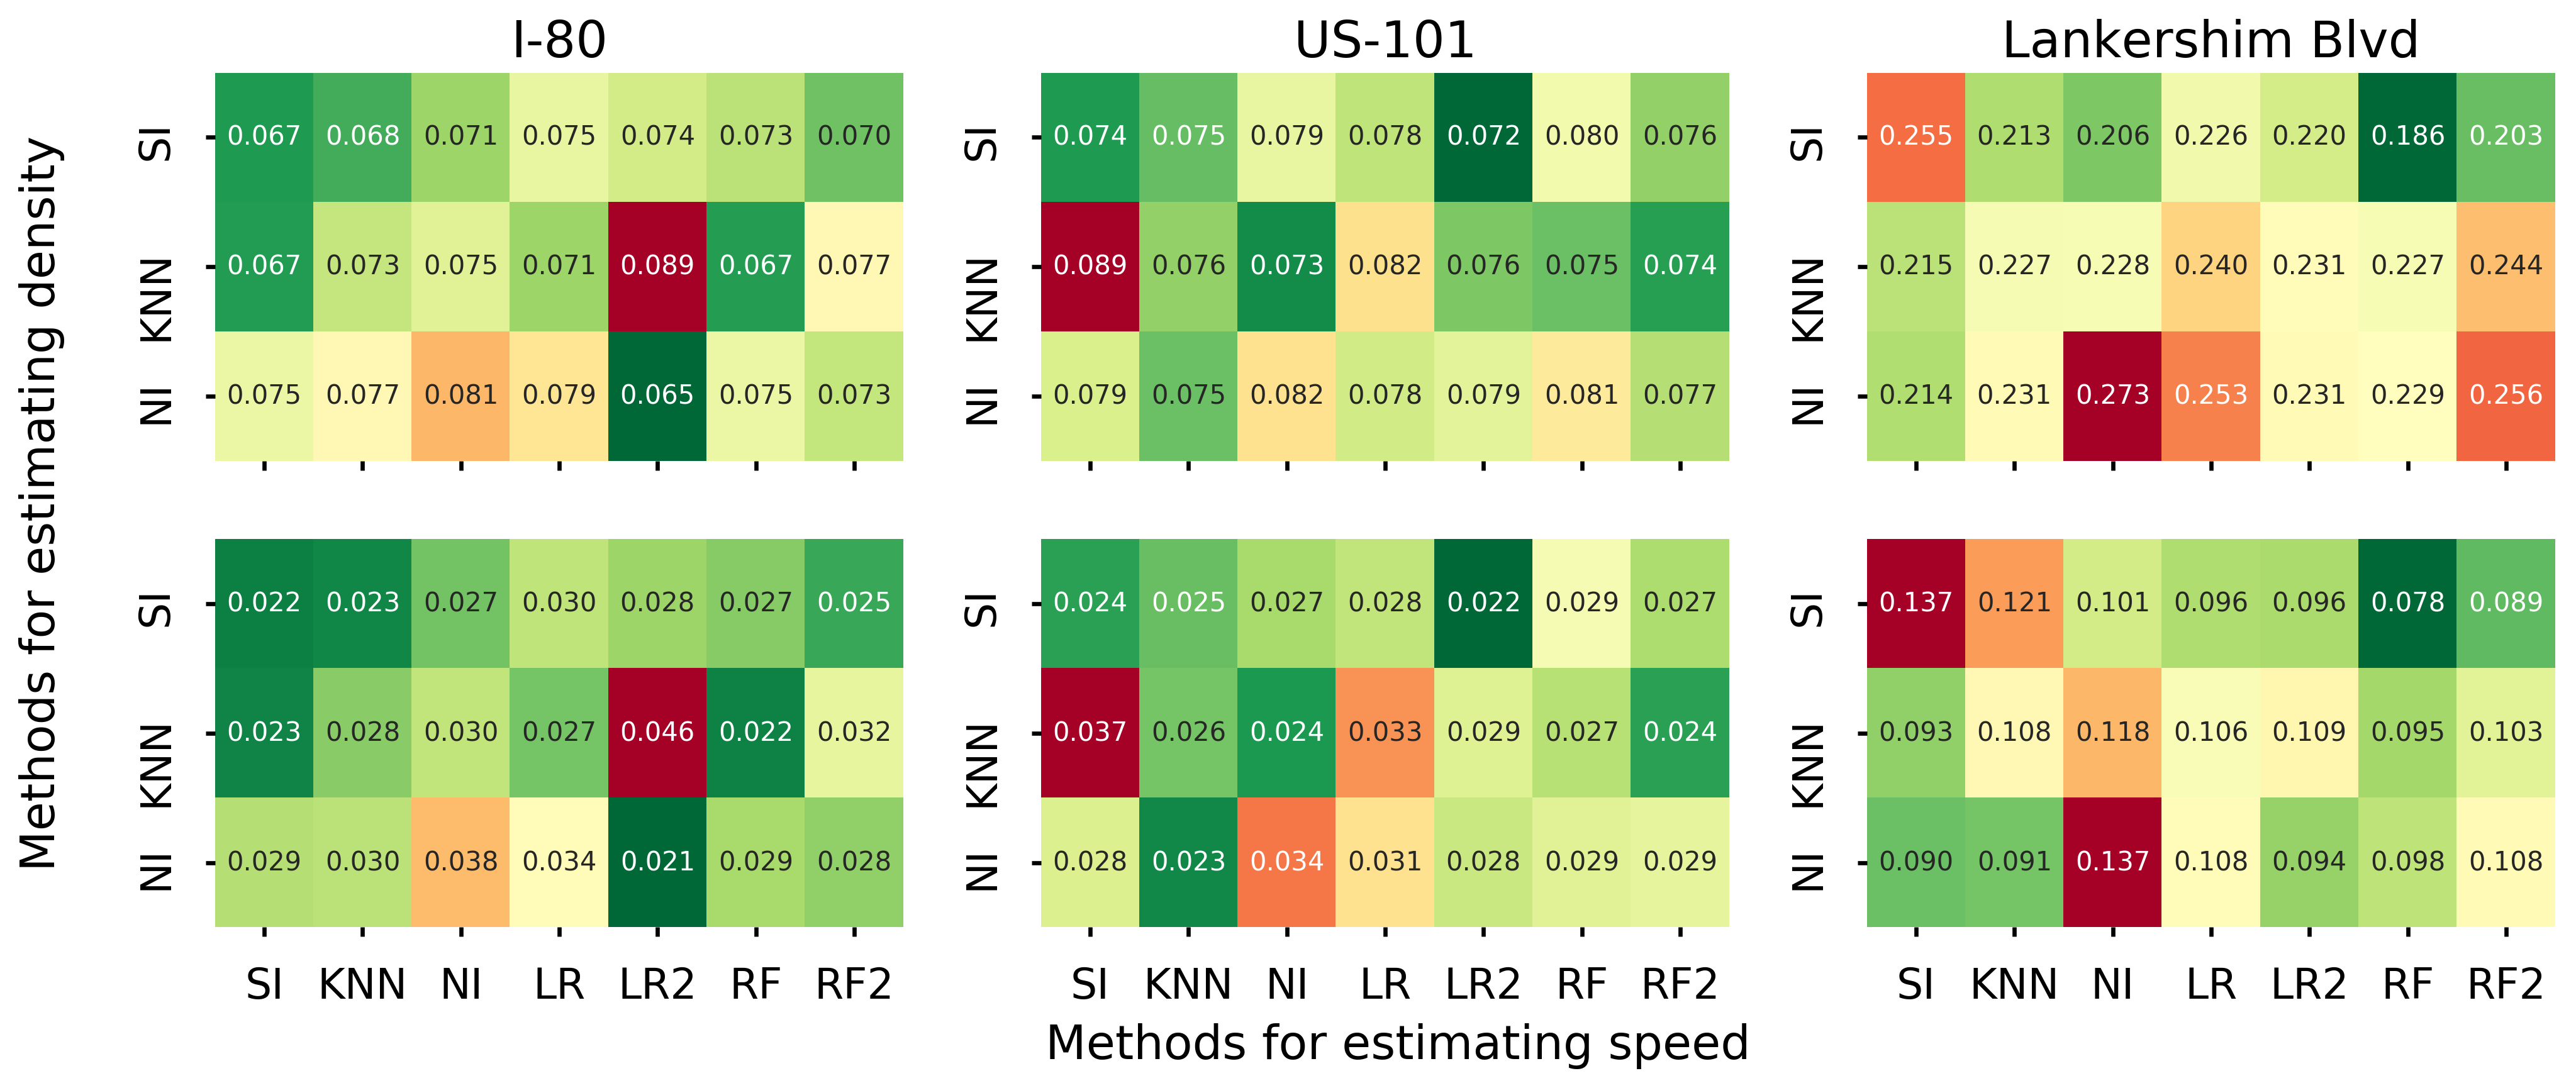

In [205]:
fig, axes = plt.subplots(2, 3, sharex=True,  figsize=(16, 6), dpi=300)
cbar_kws = {}
sns.heatmap(np.round(method_df_k1.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[0,0], cbar_kws = cbar_kws, cbar = None)
sns.heatmap(np.round(method_df_k2.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[0,1], cbar_kws = cbar_kws, cbar = None)
sns.heatmap(np.round(method_df_k3.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[0,2], cbar_kws = cbar_kws, cbar = None)
sns.heatmap(np.round(method_df_v1.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[1,0], cbar_kws = cbar_kws, cbar = None)
sns.heatmap(np.round(method_df_v2.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[1,1], cbar_kws = cbar_kws, cbar = None)
sns.heatmap(np.round(method_df_v3.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[1,2], cbar_kws = cbar_kws, cbar = None)

axes[0,0].set_title("I-80")
axes[0,1].set_title("US-101")
axes[0,2].set_title("Lankershim Blvd")


fig.text(0.06, 0.5, 'Methods for estimating density', va='center', rotation='vertical', fontsize = 18)
fig.text(0.4, 0.02, 'Methods for estimating speed', va='center',  fontsize = 18)

plt.show()

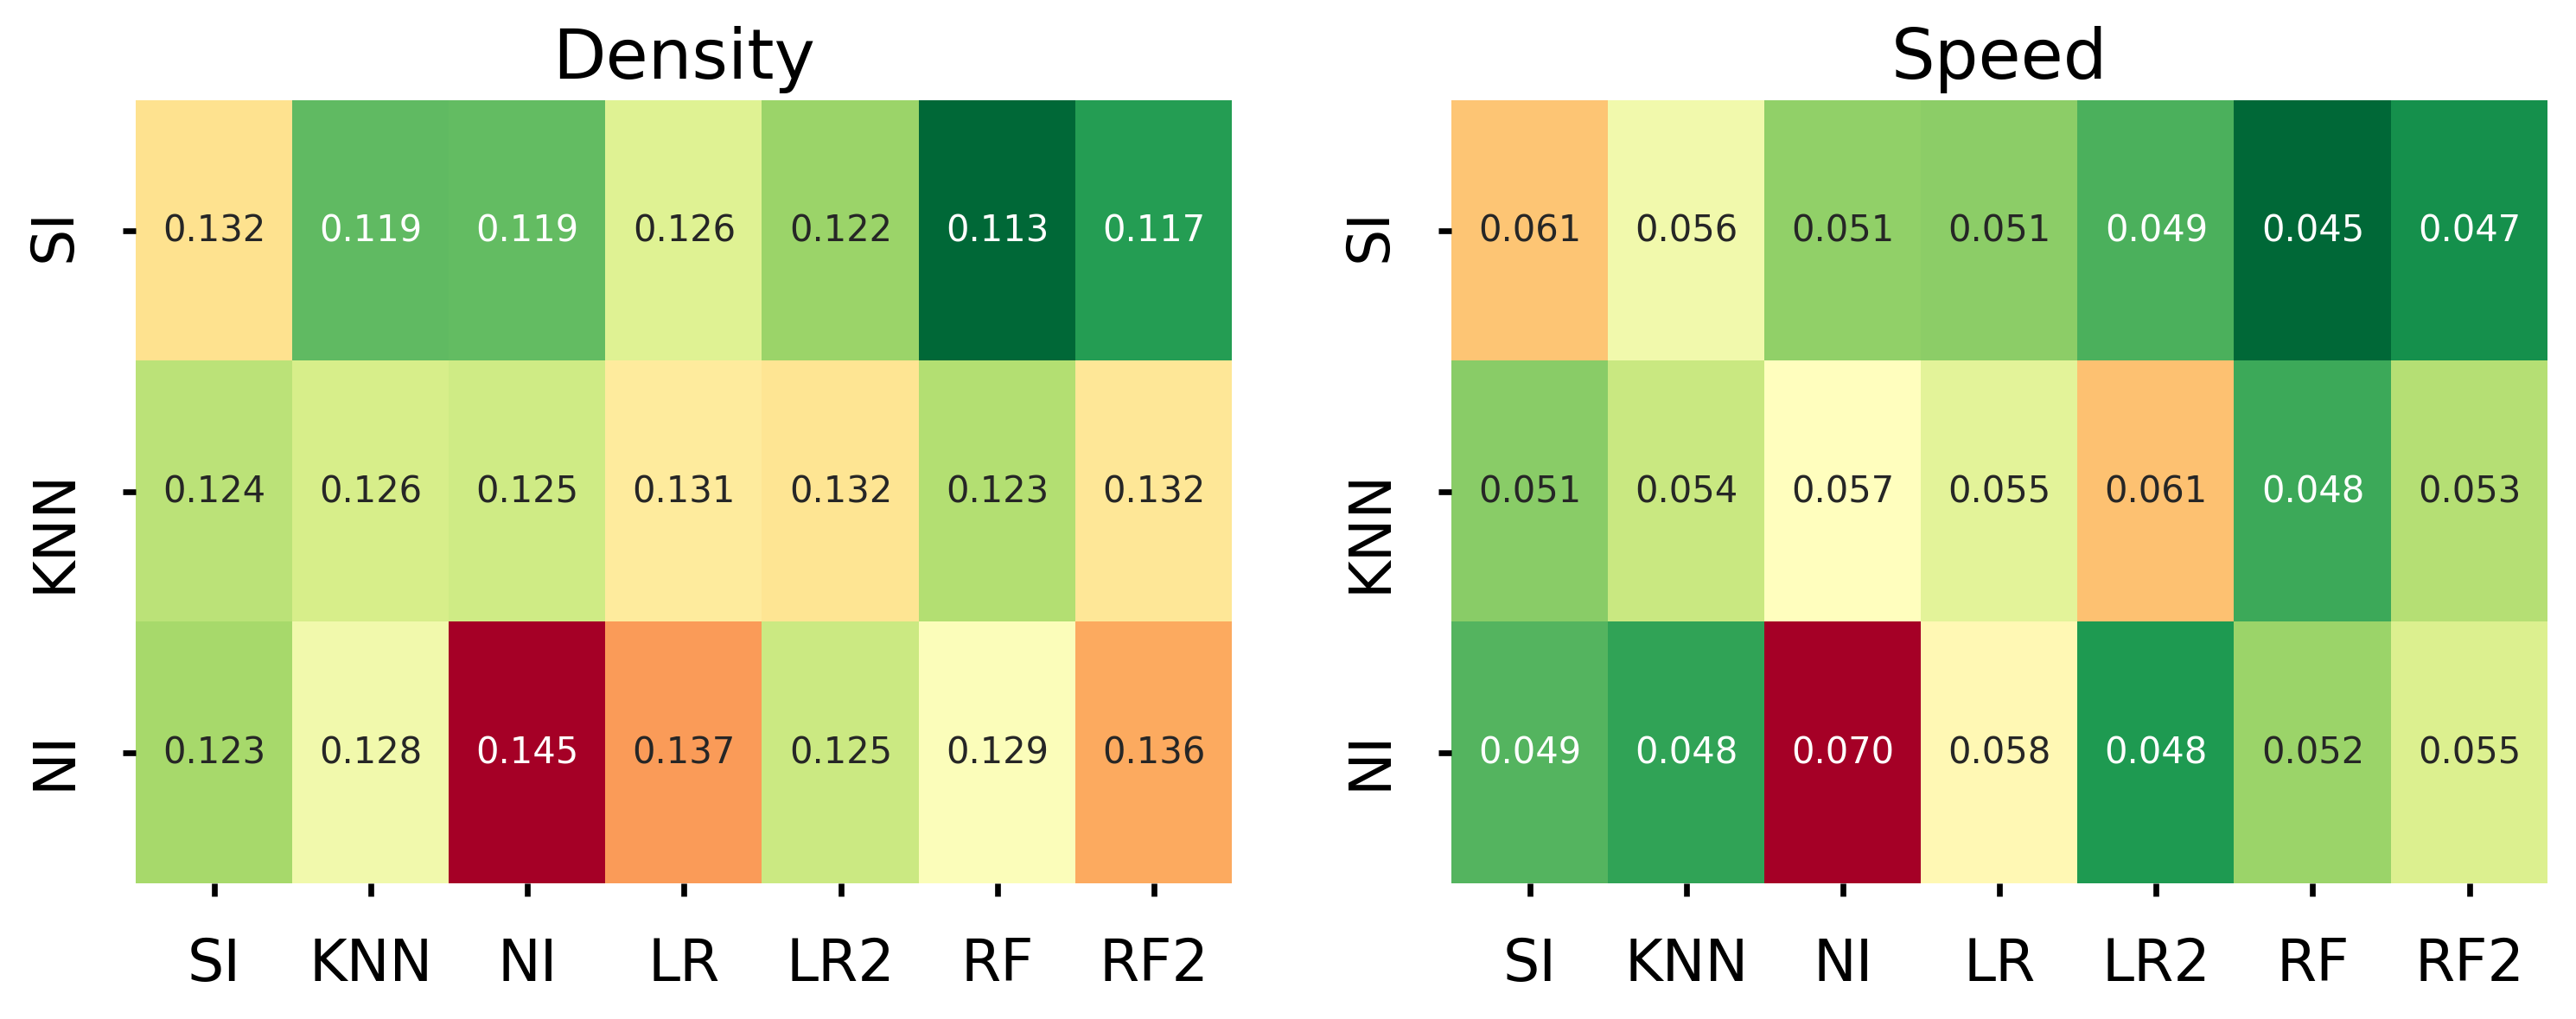

In [206]:
fig, axes = plt.subplots(1, 2, sharex=True,  figsize=(12, 4), dpi=300)
cbar_kws = {}
avek = (method_df_k1 + method_df_k2 + method_df_k3)/3
avev = (method_df_v1 + method_df_v2 + method_df_v3)/3
sns.heatmap(np.round(avek.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[0], cbar_kws = cbar_kws, cbar = None)
sns.heatmap(np.round(avev.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[1], cbar_kws = cbar_kws, cbar = None)

axes[0].set_title("Density")
axes[1].set_title("Speed")

plt.show()

### Sensing power

In [207]:
sensing_df_k1 = pd.DataFrame(index = ['S1', 'S2', 'S3'], columns = ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2'])
sensing_df_k2 = pd.DataFrame(index = ['S1', 'S2', 'S3'], columns = ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2'])
sensing_df_k3 = pd.DataFrame(index = ['S1', 'S2', 'S3'], columns = ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2'])
sensing_df_v1 = pd.DataFrame(index = ['S1', 'S2', 'S3'], columns = ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2'])
sensing_df_v2 = pd.DataFrame(index = ['S1', 'S2', 'S3'], columns = ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2'])
sensing_df_v3 = pd.DataFrame(index = ['S1', 'S2', 'S3'], columns = ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2'])

s_dict = {0: 'S1', 1: 'S2', 2: "S3"}

for sensing in [0,1,2]:
    for s2 in ['SI', 'KNN', 'NI', 'LR', 'LR2', 'RF', 'RF2']:
        [k_df1, k_df2, k_df3, v_df1, v_df2, v_df3] = sensing_result_dict[sensing][s2]
        sstr = s_dict[sensing]
        sensing_df_k1.loc[sstr, s2] = k_df1.mean(axis=0)['SMAPE1']
        sensing_df_k2.loc[sstr, s2] = k_df2.mean(axis=0)['SMAPE1']
        sensing_df_k3.loc[sstr, s2] = k_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']
        sensing_df_v1.loc[sstr, s2] = v_df1.mean(axis=0)['SMAPE1']
        sensing_df_v2.loc[sstr, s2] = v_df2.mean(axis=0)['SMAPE1']
        sensing_df_v3.loc[sstr, s2] = v_df3.loc[[1,2,3,4], :].mean(axis=0)['SMAPE1']

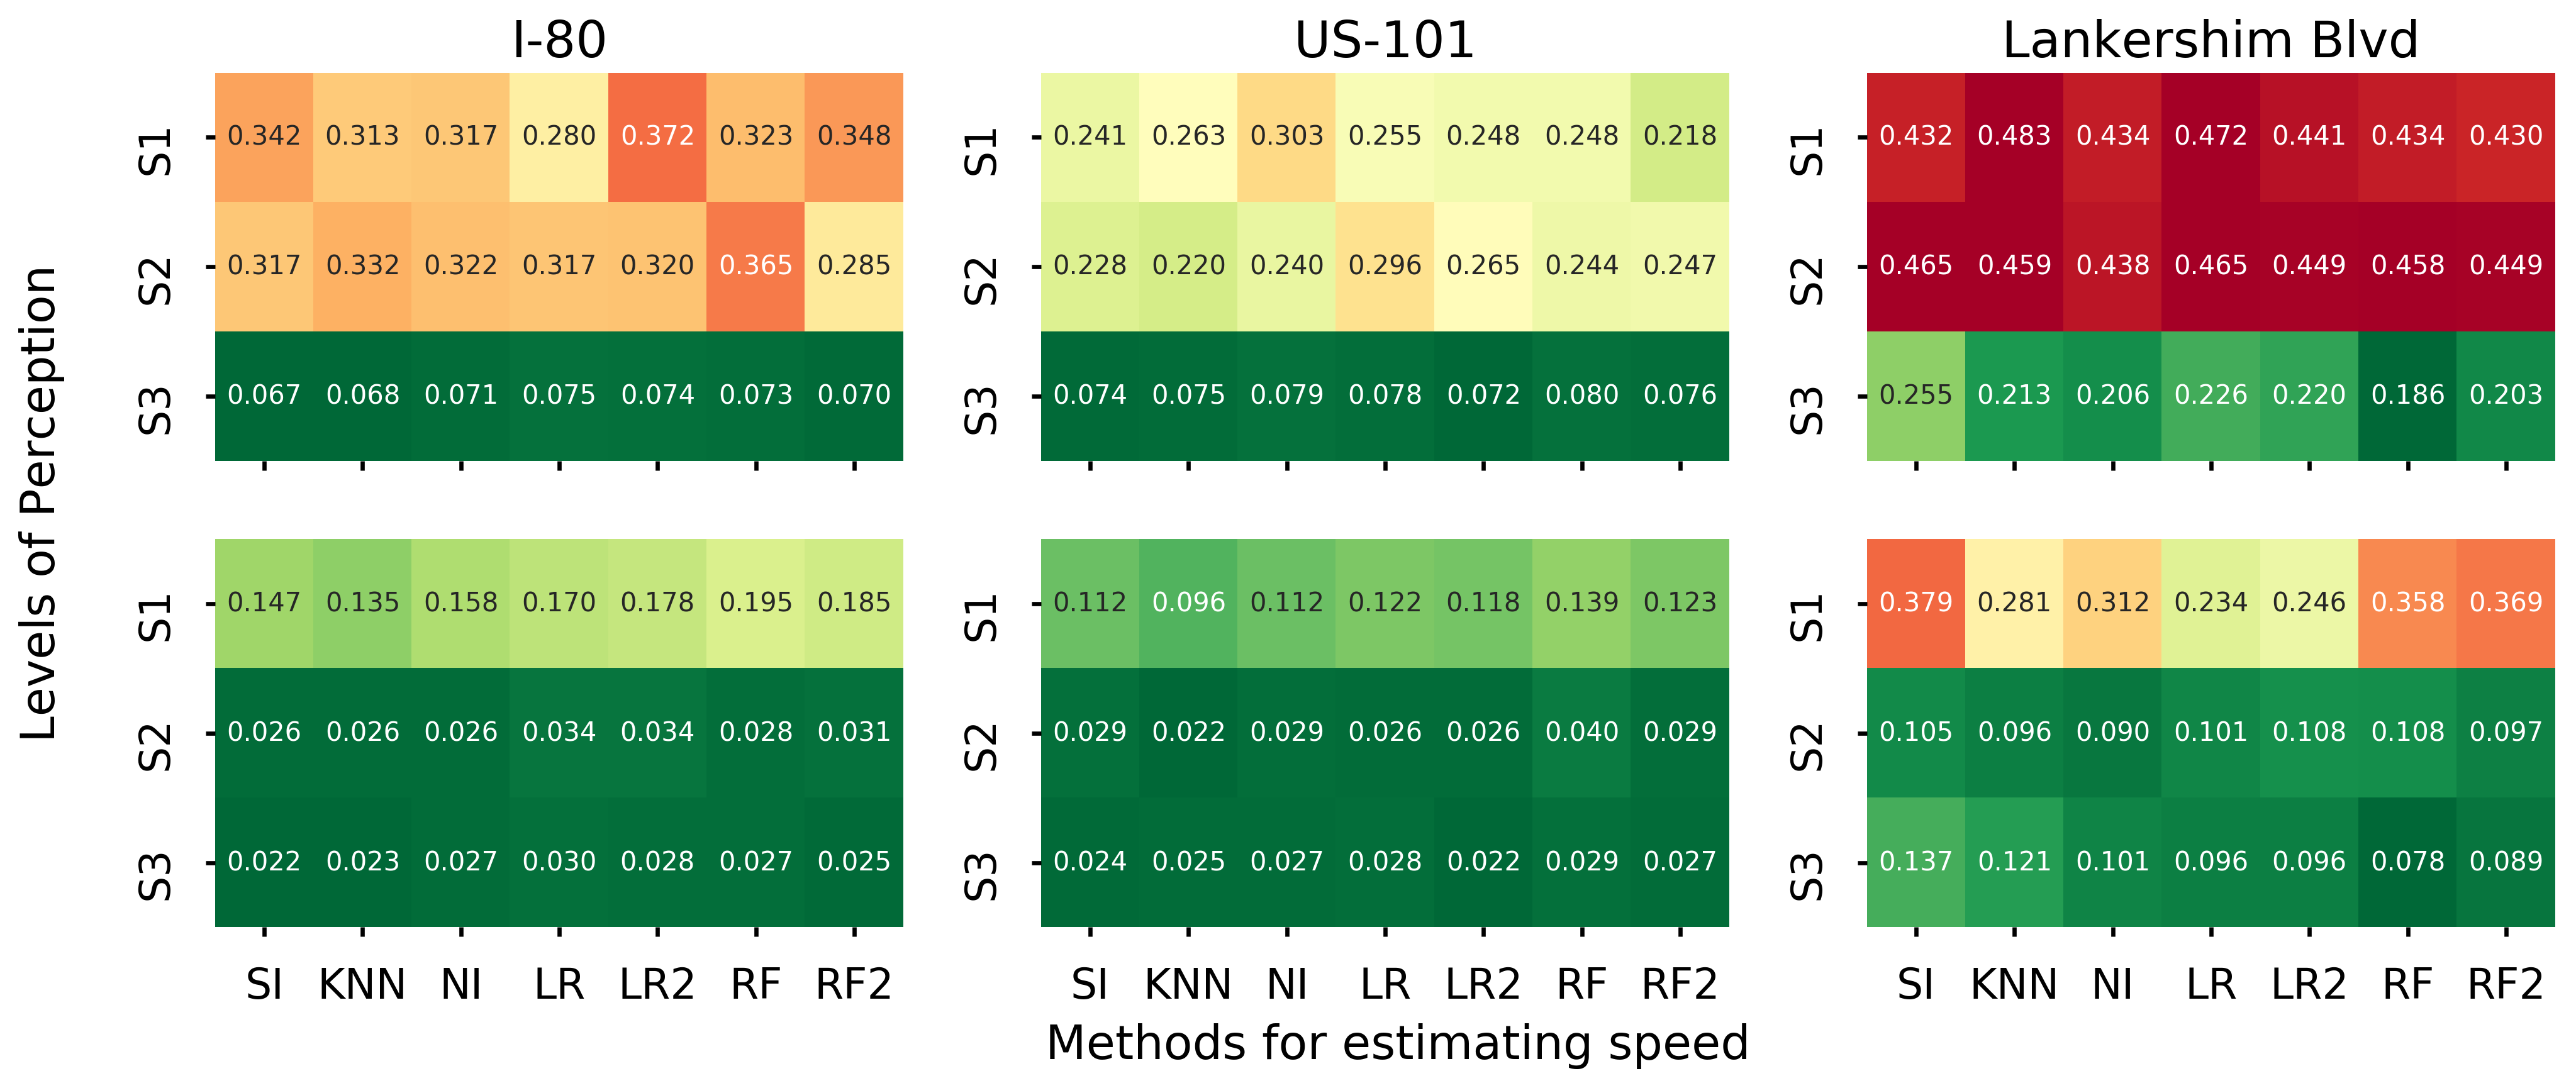

In [210]:
fig, axes = plt.subplots(2, 3, sharex=True,  figsize=(16, 6), dpi=300)
cbar_kws = {}
sns.heatmap(np.round(sensing_df_k1.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[0,0], vmax = 0.45, cbar_kws = cbar_kws, cbar = None)
sns.heatmap(np.round(sensing_df_k2.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[0,1], vmax = 0.45,cbar_kws = cbar_kws, cbar = None)
sns.heatmap(np.round(sensing_df_k3.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[0,2], vmax = 0.45,cbar_kws = cbar_kws, cbar = None)
sns.heatmap(np.round(sensing_df_v1.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[1,0], vmax = 0.45,cbar_kws = cbar_kws, cbar = None)
sns.heatmap(np.round(sensing_df_v2.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[1,1], vmax = 0.45,cbar_kws = cbar_kws, cbar = None)
sns.heatmap(np.round(sensing_df_v3.astype(np.float), 4), 
                    cmap='RdYlGn_r', annot=True,  fmt='.3f', ax = axes[1,2], vmax = 0.45,cbar_kws = cbar_kws, cbar = None)

axes[0,0].set_title("I-80")
axes[0,1].set_title("US-101")
axes[0,2].set_title("Lankershim Blvd")


fig.text(0.06, 0.5, 'Levels of Perception', va='center', rotation='vertical', fontsize = 18)
fig.text(0.4, 0.02, 'Methods for estimating speed', va='center',  fontsize = 18)

plt.show()